


#**Time Series Forecasting for yahoo stock price**





The Long Short-Term Memory (LSTM) algorithm, which is a powerful deep learning model for time series forecasting. Then we will use the popular Python library, TensorFlow, to implement the LSTM model.

The accuracy calculation might not be applicable for time series forecasting as it is typically used for classification tasks. For time series forecasting, evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE) are more appropriate.

* Data Cleaning and Preprocessing

In [ ]:
#Importing the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Reading the csv file and storing it in a dataframe
df = pd.read_csv('yahoo_stock.csv')
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117


1. Date: The date of the recorded financial data.
2. High: The highest price of the financial asset (e.g., stock) during the given
date.
3. Low: The lowest price of the financial asset during the given date.
4. Open: The opening price of the financial asset at the beginning of the given
date.
5. Close: The closing price of the financial asset at the end of the given date.
6. Volume: The trading volume or the number of shares/contracts traded
during the given date.
7. Adj Close: The adjusted closing price of the financial asset at the end of the
given date. Adjusted closing prices take into account factors such as
dividends and stock splits.

In [ ]:
#Calling the first five rows using head.
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [ ]:
#Printing all the column names using columns
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [ ]:
#Checking whether if there are any null items in the datset
df.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [ ]:
df["Date"].min(), df["Date"].max()

('2015-11-23', '2020-11-20')

In [ ]:
#Finding the unique number of each column
a= df['Date'].nunique()
print(a, "are the number of unique dates")
b = df['High'].nunique()
print(b, "are the number of unique High")
c = df['Low'].nunique()
print(c, "are the number of unique Low")
d = df['Open'].nunique()
print(d, "are the number of unique Open")
e = df['Close'].nunique()
print(e, "are the number of unique Close")
f = df['Volume'].nunique()
print(f, "are the number of unique Volume")
g = df['Adj Close'].nunique()
print(g, "are the number of unique Adj Close")

1825 are the number of unique dates
1252 are the number of unique High
1251 are the number of unique Low
1247 are the number of unique Open
1252 are the number of unique Close
1258 are the number of unique Volume
1252 are the number of unique Adj Close


In [ ]:
df['High'].unique()

array([2095.61010742, 2094.12011719, 2093.        , ..., 3619.09008789,
       3585.2199707 , 3581.22998047])

In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [ ]:
#describe
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


#**1. Technical Analysis: Use technical indicators and chart patterns to analyze price movements and identify potential buy/sell signals.**

To identify potential buy/sell signals based on your trading strategy I am using these indicators and charts. This code calculates the 50-day and 200-day moving averages and the Relative Strength Index (RSI), then plots the stock price with the moving averages and RSI.

**The Moving Average Crossover Strategy is a popular technical trading strategy used by traders to identify potential buy and sell signals in financial markets.** It involves using two or more moving averages of an asset's price and observing their crossover points to generate trading signals.

The Buy Signal is generated when the short-term moving average (Fast MA) crosses above the long-term moving average (Slow MA). This crossover is known as a "Golden Cross."
The Sell Signal is generated when the short-term moving average (Fast MA) crosses below the long-term moving average (Slow MA). This crossover is known as a "Death Cross."

A **shorter-term moving average is calculated based on the price data over a short period, such as 10 days or 20 days.** This moving average is sensitive to recent price changes and **reacts quickly to price movements**.

A **longer-term moving average is calculated based on the price data over a longer period, such as 50 days or 200 days.** This moving average is less sensitive to recent price changes and **provides a smoother trend representation.**

**The RSI is a momentum oscillator that measures the speed and change of price movements** and helps identify potential overbought and oversold conditions in a financial asset.

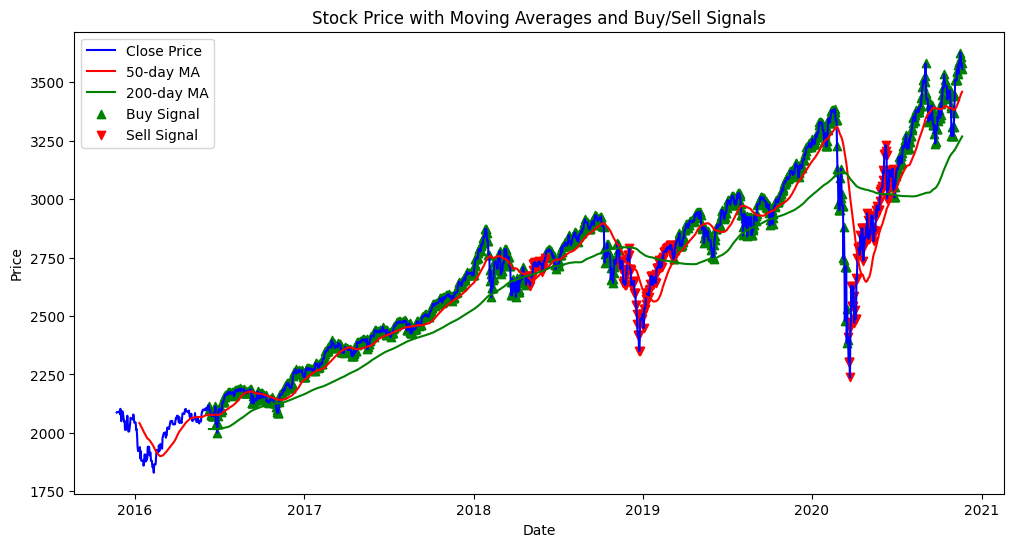

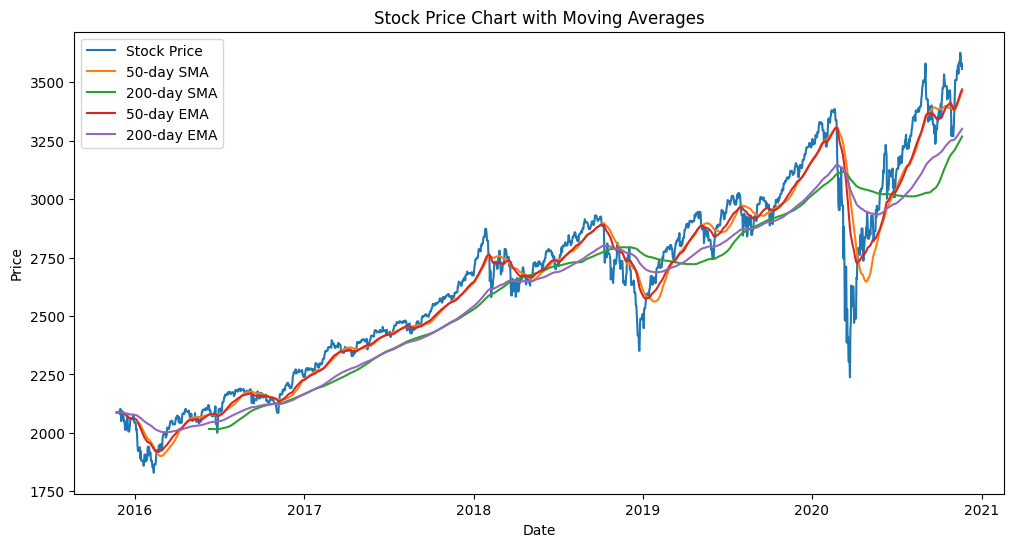

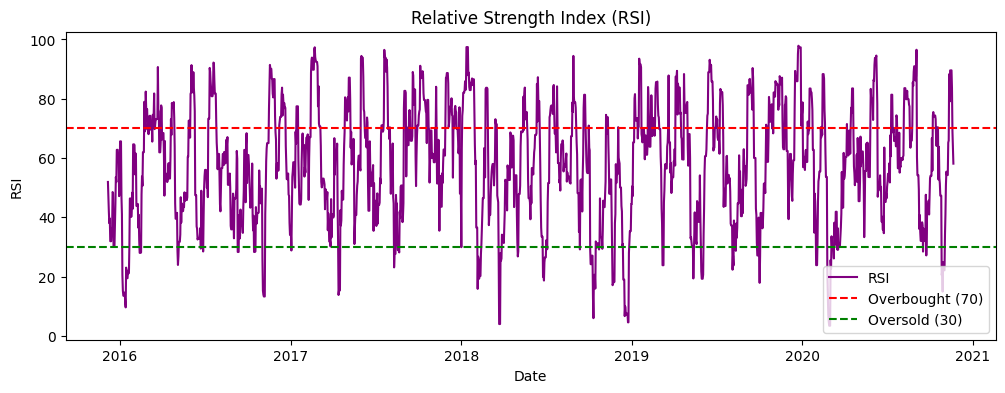

In [ ]:
#Convert the 'Date' column to datetime type
#This ensures that the 'Date' column is in the datetime format, which is necessary for proper time-series plotting and analysis.
df['Date'] = pd.to_datetime(df['Date'])

#To calculate moving averages:technical analysis indicator that calculates the average value of a financial asset's price (such as a stock) over a specified period of time.
#we can use simple moving average (SMA):summing up the closing prices and
#the exponential moving average (EMA):gives weights to recent prices
#Calculate 50-day and 200-day moving averages
#The code calculates the 50-day and 200-day simple moving averages (SMA) of the 'Close' price.
#A moving average is an indicator that smooths out price data by creating a constantly updated average price(close price).
#The window parameter specifies the number of data points to include in each moving average calculation.
#rolling(window):refers to the fact that the calculation is done over a specified window of consecutive data points as it moves forward through the data.
#it creates a "rolling view" of that column, and we can then apply various aggregation functions (e.g., mean, sum, std) to calculate metrics over that rolling window.
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()
#50 and 200 are common convention in financial markets


# Generate buy/sell signals based on moving average crossover strategy
#The code adds a new column 'Signal' to the DataFrame, initialized with 'Hold' indicating no specific action.
#The buy/sell signals are generated based on the crossover strategy:
#When the 50-day moving average (MA_50) crosses above the 200-day moving average (MA_200), a 'Buy' signal is generated, and
#when the 50-day moving average crosses below the 200-day moving average, a 'Sell' signal is generated.
df['Signal'] = 'Hold'
df.loc[df['MA_50'] > df['MA_200'], 'Signal'] = 'Buy'
df.loc[df['MA_50'] < df['MA_200'], 'Signal'] = 'Sell'

# Plot the stock price with moving averages and buy/sell signals
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['MA_50'], label='50-day MA', color='red')
plt.plot(df['Date'], df['MA_200'], label='200-day MA', color='green')

# Highlight buy and sell signals
#it highlights the buy signals with green upward-pointing triangles ('^') and
#the sell signals with red downward-pointing triangles ('v') on the plot.
#The resulting plot shows the price movements of the stock, the two moving averages, and
#the buy/sell signals generated based on the moving average crossover strategy.
buy_signals = df[df['Signal'] == 'Buy']
sell_signals = df[df['Signal'] == 'Sell']
plt.scatter(buy_signals['Date'], buy_signals['Close'], marker='^', color='g', label='Buy Signal')
plt.scatter(sell_signals['Date'], sell_signals['Close'], marker='v', color='r', label='Sell Signal')
#The crossover strategy aims to capture potential trends and reversal points in the stock's price movement.
#However, like any technical indicator, it is not foolproof and should be used in combination with other tools and analyses for better decision-making.

#The moving average crossover strategy is a popular technical analysis technique used by traders to generate buy and sell signals based on
#the interaction of two or more moving averages. It involves comparing two moving averages of different periods (e.g., short-term and long-term moving averages)
#and observing their crossovers to identify potential entry and exit points for a trade.
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with Moving Averages and Buy/Sell Signals')
plt.legend()
df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

# Calculate the 200-day EMA
df['EMA_200'] = df['Close'].ewm(span=200, adjust=False).mean()

# Plot the stock price chart with moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Stock Price')
plt.plot(df['Date'], df['MA_50'], label='50-day SMA')
plt.plot(df['Date'], df['MA_200'], label='200-day SMA')
plt.plot(df['Date'], df['EMA_50'], label='50-day EMA')
plt.plot(df['Date'], df['EMA_200'], label='200-day EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Chart with Moving Averages')
plt.legend()
plt.show()

# Calculate Relative Strength Index (RSI)
#The RSI is a momentum oscillator that measures the speed and change of price movements and
#helps identify potential overbought and oversold conditions in a financial asset.
def calculate_rsi(df, window=14):
  #2 arguments: Df, window which specifies the number of periods used to calculate the RSI. , 14 default is common period used for rsi calcs
    delta = df['Close'].diff()
    #The function first calculates the difference (delta) between the closing prices of consecutive days.
    #This represents the price change from one day to the next.
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    #The gains obtained by using 'delta.where(delta > 0, 0)' to set negative changes (losses) to zero and then taking the rolling mean over 'window' periods.
    #The condition is delta > 0, meaning it checks for positive price changes (gains).
    #If the condition is true (i.e., the price change is positive), it keeps the value unchanged.
    #If the condition is false (i.e., the price change is negative or zero), it replaces the value with 0.
    #As a result, gain now contains only the positive price changes, and any negative or zero changes are set to 0.
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss #relative strength
    df['RSI'] = 100 - (100 / (1 + rs))
    #The RSI values range from 0 to 100, with values above 70 typically considered overbought and values below 30 considered oversold.

# Plot the stock price, moving averages, and RSI
def plot_data(df):
    plt.figure(figsize=(12, 4))
    plt.plot(df['Date'], df['RSI'], label='RSI', color='purple')
    plt.axhline(70, color='r', linestyle='dashed', label='Overbought (70)')
    plt.axhline(30, color='g', linestyle='dashed', label='Oversold (30)')
    #It is used to draw a horizontal line across the plot, representing a constant value on the y-axis.
    #to represent the overbought and oversold thresholds for the RSI.
    #The plt.axhline() function is used to draw horizontal lines at the RSI levels of 70 and 30 on the RSI plot.
    #This makes it visually clear where the overbought and oversold thresholds are,
    #and it aids traders in identifying potential trading opportunities based on the RSI.
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.title('Relative Strength Index (RSI)')
    plt.legend()

    plt.show()

# Call the functions to calculate indicators and plot the data
calculate_rsi(df)
plot_data(df)

#**2. Trend Identification: Determine the overall trend of the financial asset over time (e.g., uptrend, downtrend, sideways).**

To determine the overall trend of the financial asset over time, we can use the moving averages as an indicator. **When the shorter-term moving average (e.g., 50-day MA) is above the longer-term moving average (e.g., 200-day MA), it indicates an uptrend. Conversely, when the shorter-term moving average is below the longer-term moving average, it indicates a downtrend.** If the moving averages are relatively close and cross each other frequently, it may suggest a sideways or ranging market.
In this modified code, we added the 'Trend' column to the DataFrame, where we set the trend based on the relationship between the 50-day and 200-day moving averages. The 'Trend' column will indicate whether the financial asset is in an uptrend, downtrend, or sideways market.

We then use a separate subplot to visualize the overall trend. The green area represents an uptrend, the red area represents a downtrend, and the white area represents a sideways or ranging market.

This will help us to get a visual sense of the overall trend of the financial asset over time, based on the moving averages.

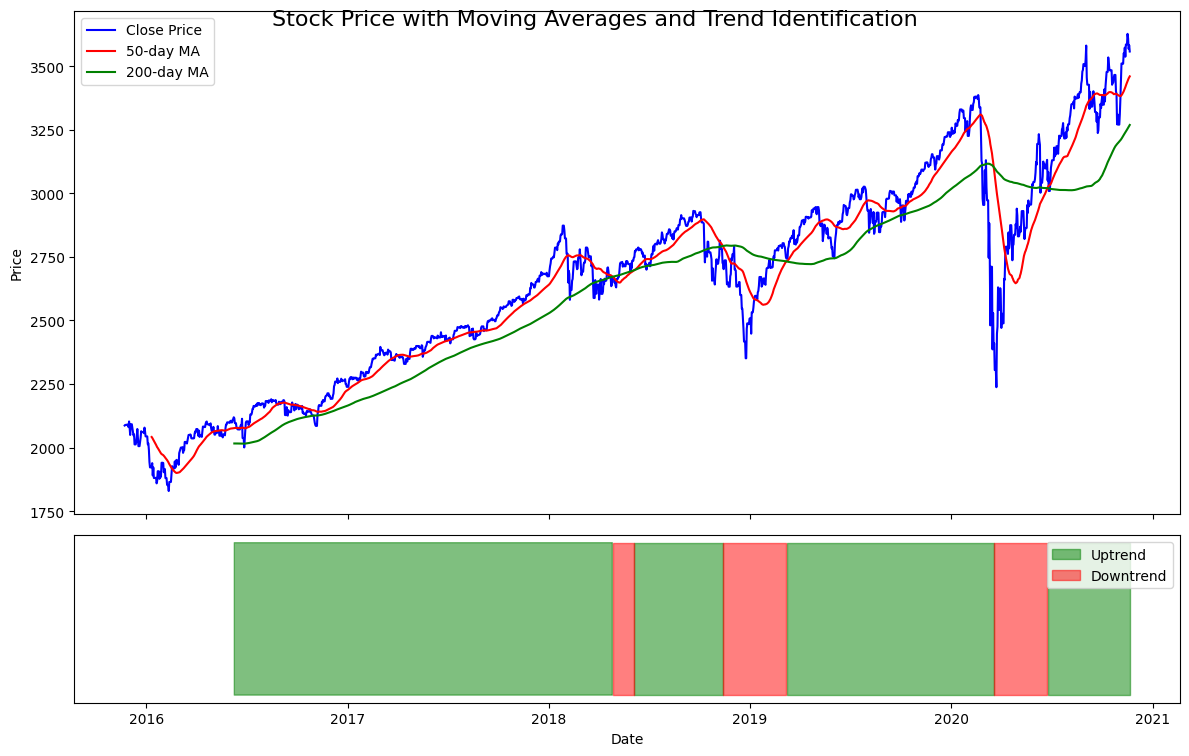

Uptrend      1374
Downtrend     252
Sideways      199
Name: Trend, dtype: int64


In [ ]:
# Calculate 50-day and 200-day moving averages
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

# Determine the trend based on moving averages
df['Trend'] = 'Sideways' #This is the default value, assuming there is no significant trend at the beginning.
df.loc[df['MA_50'] > df['MA_200'], 'Trend'] = 'Uptrend'
#the code uses the loc function to update the 'Trend' column for specific rows where the condition is met.
#if the 50-day moving average (MA_50) is greater than the 200-day moving average (MA_200), it assigns the value 'Uptrend'
df.loc[df['MA_50'] < df['MA_200'], 'Trend'] = 'Downtrend'
#Similarly, if MA_50 is less than MA_200, it assigns the value 'Downtrend' to the 'Trend'

# Create the dual-panel chart
#A dual-panel chart usually refers to a chart layout that presents 2 different chart types or 2 different time frames of the same asset or financial instrument side by side.
#This arrangement allows traders to compare and analyze different aspects of the asset's price action simultaneously.
fig, ax = plt.subplots(nrows=2, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# First Panel: Stock Price with Moving Averages
ax[0].plot(df['Date'], df['Close'], label='Close Price', color='blue')
ax[0].plot(df['Date'], df['MA_50'], label='50-day MA', color='red')
ax[0].plot(df['Date'], df['MA_200'], label='200-day MA', color='green')
ax[0].set_ylabel('Price')
ax[0].legend()

# Second Panel: Trend Identification as Area Chart
ax[1].fill_between(df['Date'], 0, 1, where=(df['Trend'] == 'Uptrend'), color='green', alpha=0.5, label='Uptrend')
ax[1].fill_between(df['Date'], 0, 1, where=(df['Trend'] == 'Downtrend'), color='red', alpha=0.5, label='Downtrend')
ax[1].set_yticks([])
ax[1].legend()

# Finalize the plot
plt.xlabel('Date')
plt.suptitle('Stock Price with Moving Averages and Trend Identification', y=0.94, fontsize=16)
plt.tight_layout()
plt.show()

print(df['Trend'].value_counts())


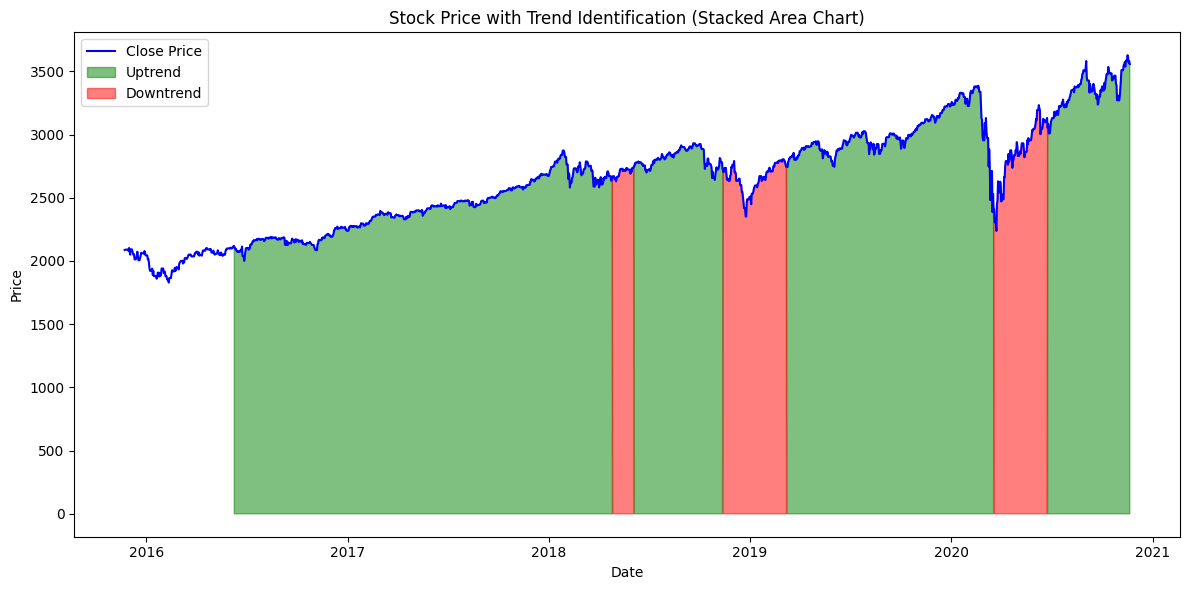

Uptrend      1374
Downtrend     252
Sideways      199
Name: Trend, dtype: int64


In [ ]:
# Determine the trend based on moving averages
df['Trend'] = 'Sideways'
df.loc[df['MA_50'] > df['MA_200'], 'Trend'] = 'Uptrend'
df.loc[df['MA_50'] < df['MA_200'], 'Trend'] = 'Downtrend'

# Create the stacked area chart
fig, ax = plt.subplots(figsize=(12, 6))

# Price Line Plot
ax.plot(df['Date'], df['Close'], label='Close Price', color='blue')

# Trend Stacked Area Chart
ax.fill_between(df['Date'], df['Close'], where=(df['Trend'] == 'Uptrend'), interpolate=True, color='green', alpha=0.5, label='Uptrend')
ax.fill_between(df['Date'], df['Close'], where=(df['Trend'] == 'Downtrend'), interpolate=True, color='red', alpha=0.5, label='Downtrend')

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Stock Price with Trend Identification (Stacked Area Chart)')
ax.legend()
plt.tight_layout()
plt.show()

print(df['Trend'].value_counts())


In this code, we first read the data from the yahoo_stock.csv file, calculate the 50-day and 200-day moving averages, and then determine the overall trend based on the relationship between these moving averages. The Trend column will indicate whether the asset is in an uptrend, downtrend, or sideways market.

We then plot the stock price chart along with the moving averages and highlight the uptrend, downtrend, and sideways periods using different colors. The green color represents the uptrend, the red color represents the downtrend, and the periods in between are sideways.

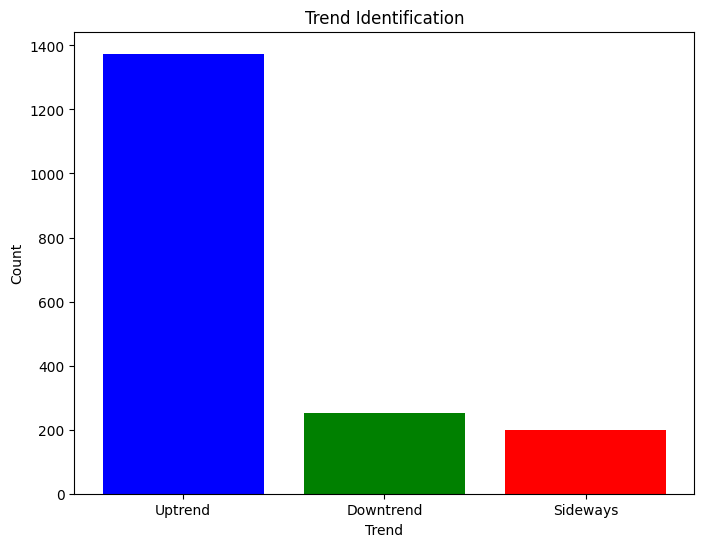

Uptrend      1374
Downtrend     252
Sideways      199
Name: Trend, dtype: int64


In [ ]:

# Determine the trend based on moving averages
df['Trend'] = 'Sideways'
df.loc[df['MA_50'] > df['MA_200'], 'Trend'] = 'Uptrend'
df.loc[df['MA_50'] < df['MA_200'], 'Trend'] = 'Downtrend'

# Count the occurrences of each trend category
trend_counts = df['Trend'].value_counts()

# Plot the bar plot for trend identification
plt.figure(figsize=(8, 6))
plt.bar(trend_counts.index, trend_counts.values, color=['blue', 'green', 'red'])
plt.xlabel('Trend')
plt.ylabel('Count')
plt.title('Trend Identification')
plt.show()

print(trend_counts)


#**3. Volatility Assessment: Measure the volatility of the financial asset to understand its price fluctuations.**

The **Average True Range (ATR) calculated in the provided code is a technical indicator used to measure the volatility of a financial asset over a specific period.** It provides insights into the average price movement (volatility) of the asset, allowing traders and analysts to assess the potential risk associated with trading or holding that asset.

In this code, we **calculate the daily percentage change in the closing price of the Yahoo stock and plot it as a line chart.** The daily percentage change indicates the price fluctuations from one day to the next, providing an insight into the volatility of the asset.

**A higher value on the chart indicates higher volatility, whereas a lower value indicates lower volatility.** The line chart helps to visualize the volatility patterns over time and understand how the price fluctuates on a daily basis.

**Volatility assessment is essential for risk management** and trading strategies, as higher volatility implies higher potential risks and rewards.

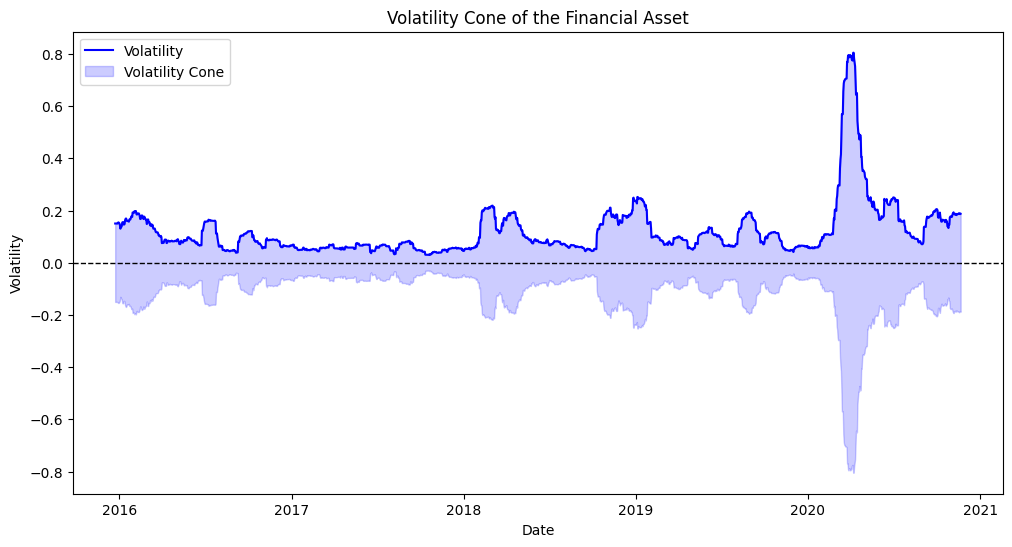

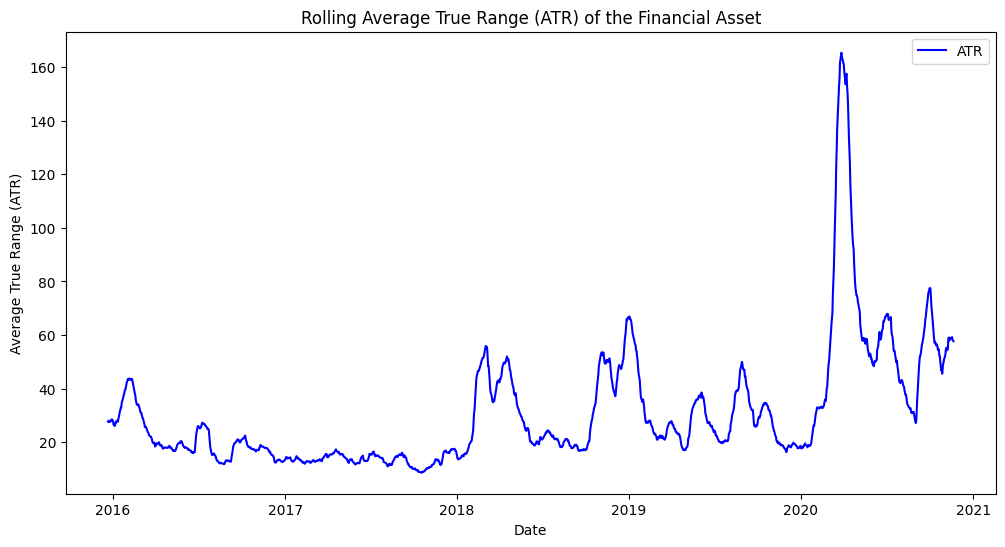

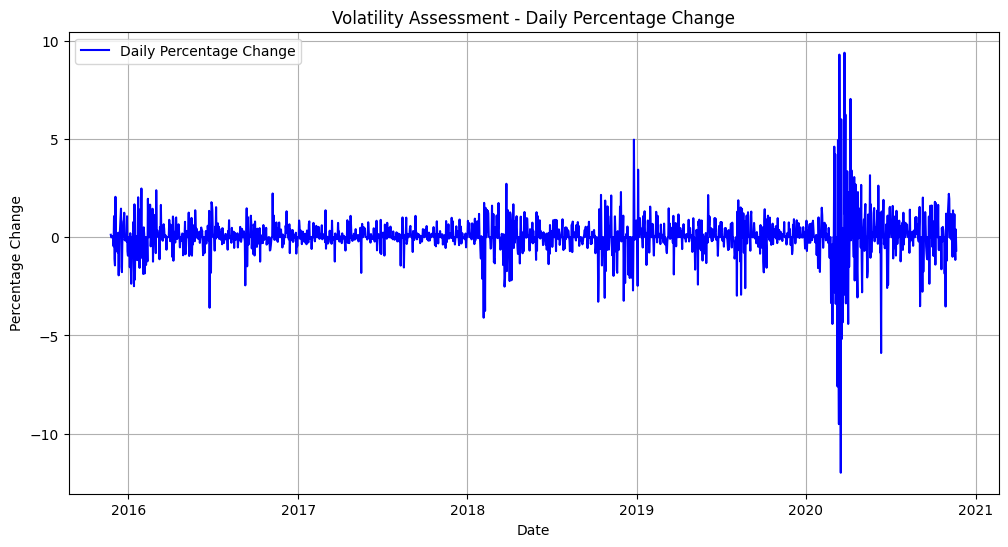

In [ ]:
#1st representation
# Calculating the daily returns of the financial asset
#'Close' column of the DataFrame is used and pct_change() function is applied,
#which calculates the percentage change between the current and previous element.
#This gives the daily return for each day.
df['Daily_Return'] = df['Close'].pct_change()

# Calculate the rolling standard deviation of daily returns over a specific window
window = 30  #window size can be adjusted
#window size is used for calculating the rolling standard deviation.It is the n0. of previous days used to compute the volatility.

#This line calculates the rolling S.D. of the daily returns over the specified window and then annualizes it to get the volatility.
#The rolling() function creates a rolling view of the 'Daily_Return' column with the specified window size.
#The std() function calculates the standard deviation of the daily returns within that window.
#The np.sqrt(252) term annualizes the volatility by assuming 252 trading days in a year.
df['Volatility'] = df['Daily_Return'].rolling(window=window).std() * np.sqrt(252)  # Annualizing the volatility

# Plot the volatility cone
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility'], label='Volatility', color='blue')
plt.fill_between(df['Date'], df['Volatility'], -df['Volatility'], color='blue', alpha=0.2, label='Volatility Cone')
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility Cone of the Financial Asset')
plt.legend()
plt.show()

#2nd representation
# Calculate True Range (TR) as the maximum of:
#   1. High minus Low
#   2. Absolute value of High minus previous Close
#   3. Absolute value of Low minus previous Close
#This line calculates the daily price range,
#which is the difference between the highest ('High') and lowest ('Low') prices for each day.
df['High_Low'] = df['High'] - df['Low']

#This line calculates the absolute difference between the current day's 'High' price and the previous day's 'Close' price.
#It measures the potential gap or price movement from the previous day's close.
df['High_PrevClose'] = abs(df['High'] - df['Close'].shift(1))

#calculates the absolute difference between the current day's 'Low' price and the previous day's 'Close' price.
#It also measures the potential gap or price movement from the previous day's close, but from the lower end.
df['Low_PrevClose'] = abs(df['Low'] - df['Close'].shift(1))

#This line calculates the True Range (TR) for each day as the maximum value among the three calculated ranges.
#It selects the highest value from 'High_Low', 'High_PrevClose', and 'Low_PrevClose' using the max() function along the columns (axis=1).
df['TR'] = df[['High_Low', 'High_PrevClose', 'Low_PrevClose']].max(axis=1)

# Calculate Average True Range (ATR) using rolling mean over a specific window
window = 30
df['ATR'] = df['TR'].rolling(window=window).mean()

# Plot the Rolling Average True Range (ATR) chart
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['ATR'], label='ATR', color='blue')
plt.xlabel('Date')
plt.ylabel('Average True Range (ATR)')
plt.title('Rolling Average True Range (ATR) of the Financial Asset')
plt.legend()
plt.show()

#3rd representation
# Calculate the daily percentage change in the closing price
df['Daily_Return'] = df['Close'].pct_change() * 100

# Plot the volatility chart
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily_Return'], label='Daily Percentage Change', color='blue')

plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.title('Volatility Assessment - Daily Percentage Change')
plt.legend()
plt.grid(True)

plt.show()


#**4. Correlation Analysis: Explore correlations between this financial asset and other related assets or market indices.**

This code calculates the correlation matrix for the financial asset in the 'yahoo_stock' dataset and displays it as a heatmap using Python's Matplotlib and Seaborn libraries.

This line calculates the correlation matrix for the DataFrame 'df,' which contains the 'Close' prices of the financial asset and any other related assets or indices that you might have included in the DataFrame. The correlation matrix shows the pairwise correlations between all the columns in the DataFrame, with each element representing the correlation between two variables.

The heatmap provides a visual representation of the correlation matrix, making it easier to identify the strength and direction of the relationships between different variables (e.g., the financial asset and other related assets or indices). The color intensity of each cell represents the strength of the correlation, and the annotations inside the cells show the correlation coefficients.
 The heatmap is a valuable tool for analyzing the interrelationships between various financial assets and can be helpful in forming investment strategies, identifying diversification opportunities, and managing portfolio risk.

<ipython-input-23-95dc88b4d063>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                    High       Low      Open     Close    Volume  Adj Close  \
High            1.000000  0.998154  0.999328  0.998958  0.084212   0.998958   
Low             0.998154  1.000000  0.998794  0.999020  0.044557   0.999020   
Open            0.999328  0.998794  1.000000  0.998344  0.069729   0.998344   
Close           0.998958  0.999020  0.998344  1.000000  0.063401   1.000000   
Volume          0.084212  0.044557  0.069729  0.063401  1.000000   0.063401   
Adj Close       0.998958  0.999020  0.998344  1.000000  0.063401   1.000000   
MA_50           0.973556  0.962811  0.969567  0.967966  0.146320   0.967966   
MA_200          0.919007  0.900310  0.910925  0.909730  0.335345   0.909730   
EMA_50          0.983782  0.974963  0.980663  0.979149  0.138887   0.979149   
EMA_200         0.958074  0.944915  0.952583  0.951444  0.213499   0.951444   
RSI             0.143778  0.170968  0.149018  0.164170 -0.169846   0.164170   
Daily_Return    0.015572  0.023992 -0.001756  0.0413

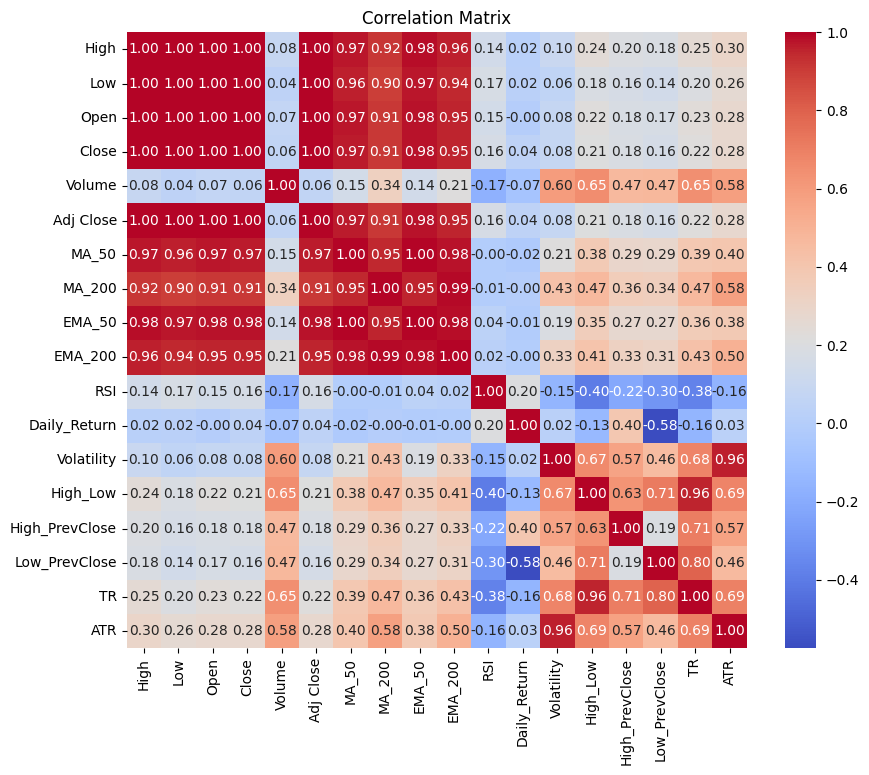

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8));
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") #annot: adds numeric annotations
#".2f" means floating-point numbers with two decimal places.
plt.title("Correlation Matrix")
plt.show()
#each cell's color represents the strength and direction of the correlation between two variables.
#The annotations inside the cells will display the correlation coefficients with two decimal places.

#**5. Moving Average Crossover Strategy: Implement a simple trading strategy using moving average crossovers.**

* Implement a simple trading strategy using the Moving Average Crossover Strategy for the 'yahoo_stock' dataset.

* We will use the 'Close' price and two moving averages: a short-term (Fast MA) and a long-term (Slow MA) moving average.

* we will use the 50-day Simple Moving Average (SMA) as the short-term moving average and the 200-day Simple Moving Average as the long-term moving average.

* We then plot the Closing Prices, Fast MA, Slow MA, and the trading signals on a graph to visualize the strategy.

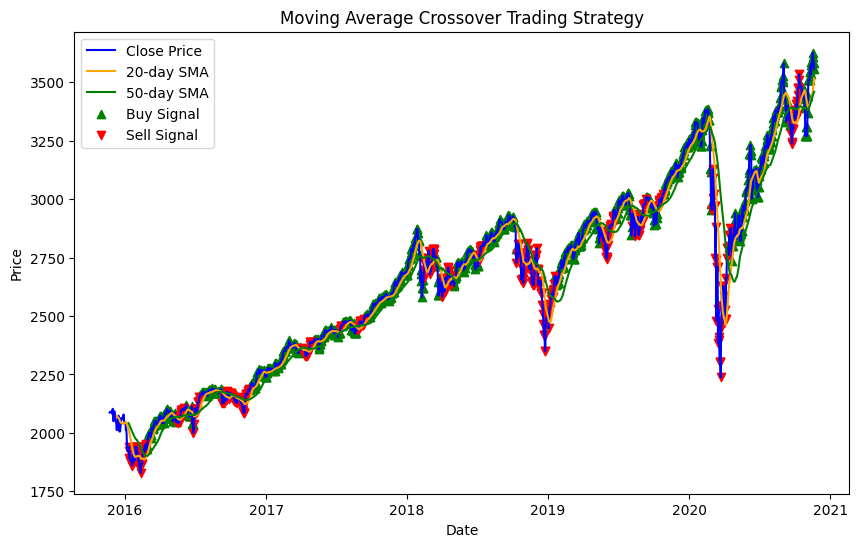

In [ ]:
df['MA_20'] = df['Close'].rolling(window=20).mean()

# Generate buy/sell signals based on crossovers
df['Signal'] = 0
df.loc[df['MA_20'] > df['MA_50'], 'Signal'] = 1  # Buy signal
df.loc[df['MA_20'] < df['MA_50'], 'Signal'] = -1  # Sell signal

# Plot the price and moving averages along with the buy/sell signals
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['MA_20'], label='20-day SMA', color='orange')
plt.plot(df['Date'], df['MA_50'], label='50-day SMA', color='green')
plt.scatter(df[df['Signal'] == 1]['Date'], df[df['Signal'] == 1]['Close'], marker='^', color='g', label='Buy Signal')
plt.scatter(df[df['Signal'] == -1]['Date'], df[df['Signal'] == -1]['Close'], marker='v', color='r', label='Sell Signal')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Trading Strategy')
plt.legend()
plt.show()


#**6. Seasonal Analysis: Analyze seasonal patterns in the financial asset&#39;s price movements.**

This code performs seasonal decomposition of a time series using the seasonal_decompose function from statsmodels.tsa.seasonal. Seasonal decomposition is a method used to decompose a time series into its underlying components: trend, seasonality, and residual (or noise).

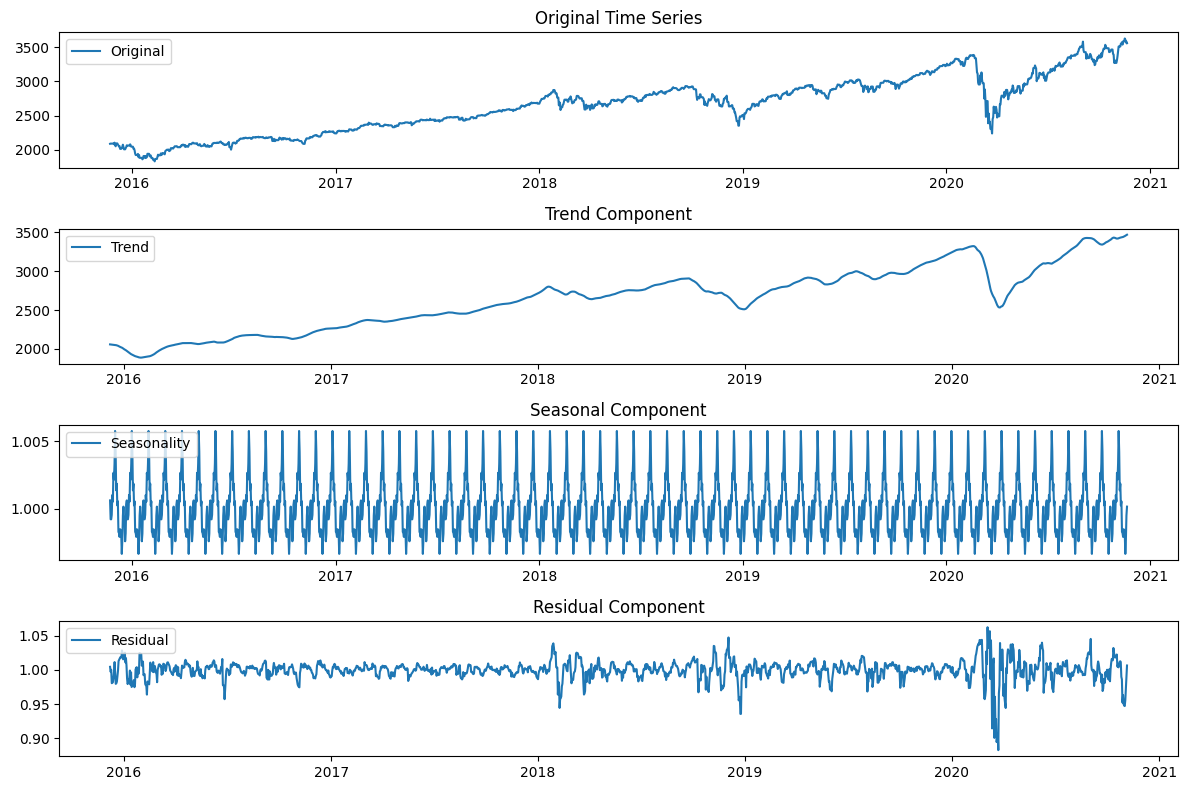

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
#The seasonal_decompose function from statsmodels.tsa.seasonal is used to decompose a time series into its underlying components:
#trend, seasonality, and residual (or error)., is helpful in understanding the underlying patterns and characteristics of a time series,
#which can aid in time series forecasting and analysis.


# Set the 'Date' column as the index
df.set_index('Date', inplace=True)
#sets 'Date' column as index of DataFrame. This step is required for time series analysis & seasonal decomposition.

# Performing seasonal decomposition
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=30)  # Set the seasonal period as 30 for monthly data.
#The seasonal_decompose function takes the time series data (df['Close']) as input and decomposes it into its components.
#The model parameter specifies decomposition model, period as 30, assuming monthly data- 30 data points (months).

# Extracting the components: trend, seasonality, and residual - extracts the trend component from the decomposition result.
#The trend component represents the underlying long-term trend or direction of the time series, abstracting from short-term fluctuations.
trend = decomposition.trend

#The seasonal component represents the periodic fluctuations or patterns that repeat over a fixed period
seasonal = decomposition.seasonal
#residual component (also known as the noise component)
#The residual component represents the random fluctuations or noise that cannot be explained by the trend and seasonal components.
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df['Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()
#The resulting plot shows the original time series (closing prices) along with the individual components: trend, seasonality, and residual.
#This decomposition helps in understanding underlying patterns and variations in time series data, making it easier to analyze and model time series.

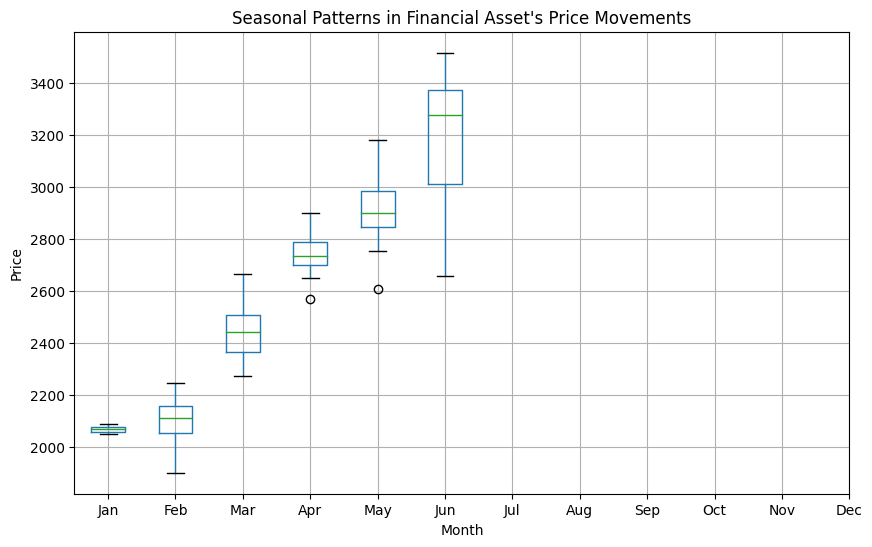

In [ ]:
# Assuming you have the 'yahoo_stock' dataset loaded into a DataFrame named 'df'.
# If not, you can read your data into a DataFrame using pd.read_csv or other appropriate methods.

# Extract the month from the 'Date' column
df['Month'] = df.index.month

# Group the data by month and year, and calculate the mean price for each group
monthly_prices = df.groupby(['Month', df.index.year])['Close'].mean().unstack()

# Create a box plot to visualize the distribution of prices for each month
plt.figure(figsize=(10, 6))
monthly_prices.boxplot()
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Seasonal Patterns in Financial Asset\'s Price Movements')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


#**7. Risk Management: Calculate risk metrics like Value at Risk (VaR) to assess potential losses under adverse market conditions.**

In [ ]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()


# Set the confidence level and holding period
#It means that the calculated VaR will estimate the potential loss at a 95% confidence level.
confidence_level = 0.05  # 95% confidence level


holding_period = 1  # 1-day holding period, representing the potential loss over the next trading day.

# Calculate the mean and standard deviation of daily returns
mean_return = df['Daily_Return'].mean()

#The standard deviation measures the volatility or risk associated with the asset's returns.
std_dev = df['Daily_Return'].std()

# Calculate the VaR using the inverse cumulative distribution function (percentile function)
#The np.percentile function calculates the value at the specified percentile (in this case, the 5th percentile) of the daily returns.
#Multiplying by np.sqrt(holding_period) adjusts the VaR for the holding period.
VaR = np.percentile(df['Daily_Return'], confidence_level * 100) * np.sqrt(holding_period)

# Calculate the potential loss in dollar amount based on the VaR
#This sets the initial investment amount to $100,000 (replace it with the actual investment amount).
initial_investment = 100000  # Replace with the initial investment amount
#This calculates the potential loss in dollar amount based on the VaR.
#The potential loss is estimated by multiplying the VaR by the initial investment amount.
potential_loss = initial_investment * VaR

print("VaR (95% confidence level, 1-day holding period): {:.2f}%".format(VaR * 100))
print("Potential loss in dollar amount: ${:.2f}".format(potential_loss))


VaR (95% confidence level, 1-day holding period): nan%
Potential loss in dollar amount: $nan


#RMSE

**RMSE(he range of Root Mean Squared Error)** is a measure of the prediction error, a smaller RMSE indicates better performance, as it means the model's predictions are closer to the actual values. Conversely, a larger RMSE indicates poorer performance, with the model's predictions deviating further from the true values.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Let's use the 'Adj Close' column for forecasting
ts_data = df['Adj Close']

# Split the data into training and testing sets
train_size = int(len(ts_data) * 0.8)
train_data, test_data = ts_data[:train_size], ts_data[train_size:]

# ARIMA model fitting
order = (5, 1, 0)  # Example order for ARIMA model (p, d, q)
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Forecasting
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print("Root Mean Squared Error (RMSE):", rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Root Mean Squared Error (RMSE): 278.60489082582035


RMSE is expressed in the same unit as the data being forecasted, in this case, it likely represents the currency value (e.g., dollars) for the 'Adj Close' column of the 'yahoo_stock' dataset.

Magnitude of Error: The RMSE of 278.60 means that, on average, the predictions made by the forecasting model have an error of approximately $278.60 compared to the true values in the test dataset.

Scale of the Data: To assess the significance of the RMSE, you should consider the scale of the data. For example, if the data range is in the thousands or higher, an RMSE of 278.60 might indicate relatively small prediction errors. On the other hand, if the data range is smaller, the RMSE might be considered significant.

Comparing to the Data Range: As a rule of thumb, it's helpful to compare the RMSE to the range of the data. If the RMSE is much smaller than the data range, it suggests that the model's predictions are relatively accurate. If the RMSE is in the same order of magnitude or larger than the data range, it indicates that the model's predictions are not performing well.

Model Performance: In general, lower RMSE values indicate better model performance, as it means the model's predictions are closer to the true values. However, the acceptable level of RMSE depends on the specific context and the requirements of the forecasting task.

#***Other Evaluation Metrics***

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
# Let's use the 'Adj Close' column for forecasting
ts_data = df['Adj Close']

# Split the data into training and testing sets
train_size = int(len(ts_data) * 0.8)
train_data, test_data = ts_data[:train_size], ts_data[train_size:]

# ARIMA model fitting
order = (5, 1, 0)  # Example order for ARIMA model (p, d, q)
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Forecasting
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, forecast)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data, forecast)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate Percentage Error
percentage_error = (forecast - test_data) / test_data * 100
print("Percentage Error:")
print(percentage_error)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE): 228.09520423774822
Mean Absolute Percentage Error (MAPE): 7.443951966440436
Percentage Error:
2019-11-22    -0.216062
2019-11-23    -0.240223
2019-11-24    -0.233731
2019-11-25    -0.975126
2019-11-26    -1.196170
                ...    
2020-11-16   -14.445329
2020-11-17   -14.033383
2020-11-18   -13.027650
2020-11-19   -13.369532
2020-11-20   -12.777064
Freq: D, Length: 365, dtype: float64


**Output Explanation:**

Mean Absolute Error (MAE): The MAE value of 228.09520423774822 represents the average absolute difference between the predicted values and the true values in the test dataset. In this case, the average prediction error is approximately $228.10 (since the 'Adj Close' column represents currency values, e.g., dollars).

Mean Absolute Percentage Error (MAPE): The MAPE value of 7.443951966440436 indicates the average percentage difference between the predicted values and the true values in the test dataset. It is expressed as a percentage. In this case, the average percentage error is approximately 7.44%. MAPE is a relative error metric that allows you to understand the magnitude of the error relative to the true values.

Percentage Error: The third part of the output provides the percentage error for each individual forecasted point in the test dataset relative to its corresponding true value. The percentage error is expressed as a percentage and shows the percentage difference between the predicted and true values for each day in the test set.

The MAE and MAPE values give you an overall assessment of the model's accuracy and performance. A lower MAE and MAPE indicate better model performance since they imply smaller prediction errors.

The percentage error for each day in the test set allows you to understand how well the model performed on individual data points. Positive percentage errors mean the model overestimated the true values, while negative percentage errors mean the model underestimated the true values.

The MAPE and percentage errors are useful for understanding the relative size of the errors compared to the true values. For example, if the percentage error is -1.5%, it means the model's prediction was 1.5% below the true value for that day.

#**8. Forecasting: Use time series forecasting models to predict future price movements of the financial asset.**

* This code performs time series forecasting using the ARIMA (AutoRegressive Integrated Moving Average) model. The ARIMA model is a popular technique for modeling and forecasting time series data.
* The resulting plot shows the historical closing prices (training data), the actual closing prices (test data), and the forecasted closing prices (forecast) based on the ARIMA model. It helps to visualize how well the ARIMA model captures the future price movements of the financial asset. Note that the performance of the ARIMA model and the accuracy of the forecasts depend on various factors, including the choice of the order (p, d, q), the quality of the data, and the characteristics of the time series.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


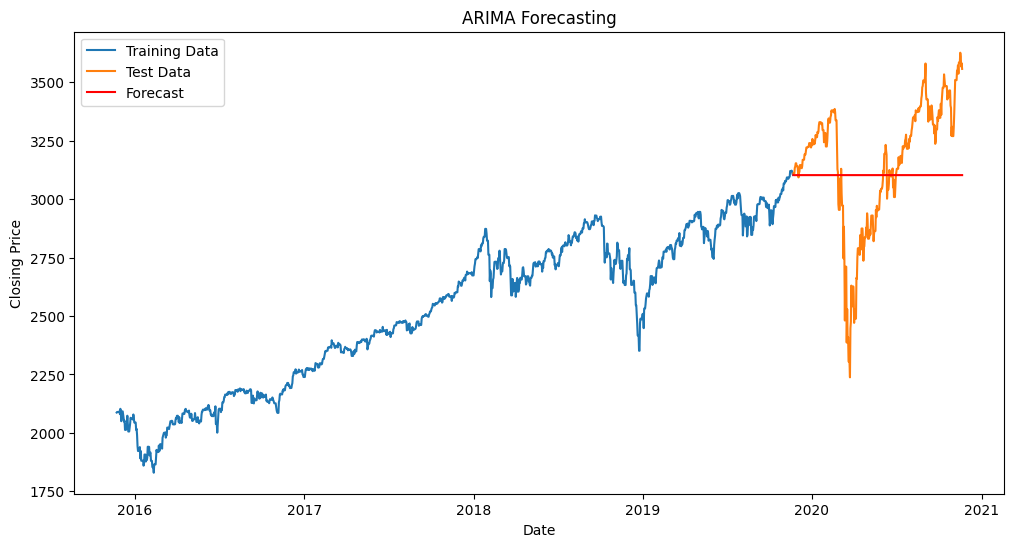

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Assuming the 'Date' column is already set as the index
# Let's use the 'Close' column for forecasting
ts_data = df['Close']
#This line extracts the 'Close' price data from the DataFrame and assigns it to the variable ts_data. This data will be used for forecasting.

# Split the data into training and testing sets
train_size = int(len(ts_data) * 0.8)
#This calculates the size of the training set, which is 80% of the total data points in ts_data. The remaining 20% will be used as the test set.
train_data, test_data = ts_data[:train_size], ts_data[train_size:]
#This splits the data into training and testing sets. The first train_size data points are used for training, and the rest are used for testing.

# ARIMA model fitting
#This is an example order for the ARIMA model, represented as (p, d, q).
#In this case, we have set the order to (5, 1, 0), which means the model will have an
#autoregressive component of order 5 (AR(5)), differencing of order 1 (d=1), and a moving average component of order 0 (MA(0)).
#The order values are determined based on the autocorrelation and partial autocorrelation plots of the data.
order = (5, 1, 0)  # Example order for ARIMA model (p, d, q)
model = ARIMA(train_data, order=order)#This creates an ARIMA model with the specified order and fits it to the training data.
model_fit = model.fit()#This fits the ARIMA model to the training data, estimating the model parameters.

# Forecasting
#This sets the number of steps to forecast to be equal to the length of the test data.
#We will forecast future values for as many data points as we have in the test set.
forecast_steps = len(test_data)
#This generates the forecasted values for the test set using the ARIMA model. The forecasted values are stored in the forecast variable.
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


#**9. Trading Volume Analysis: Analyze trading volume patterns to understand market interest and liquidity.**

This code performs various analyses and visualizations related to the trading volume of a financial asset. The DataFrame contains the financial data with the 'Volume' column representing the trading volume for each day.

count    1.825000e+03
mean     3.869627e+09
std      1.087593e+09
min      1.296540e+09
25%      3.257950e+09
50%      3.609740e+09
75%      4.142850e+09
max      9.044690e+09
Name: Volume, dtype: float64


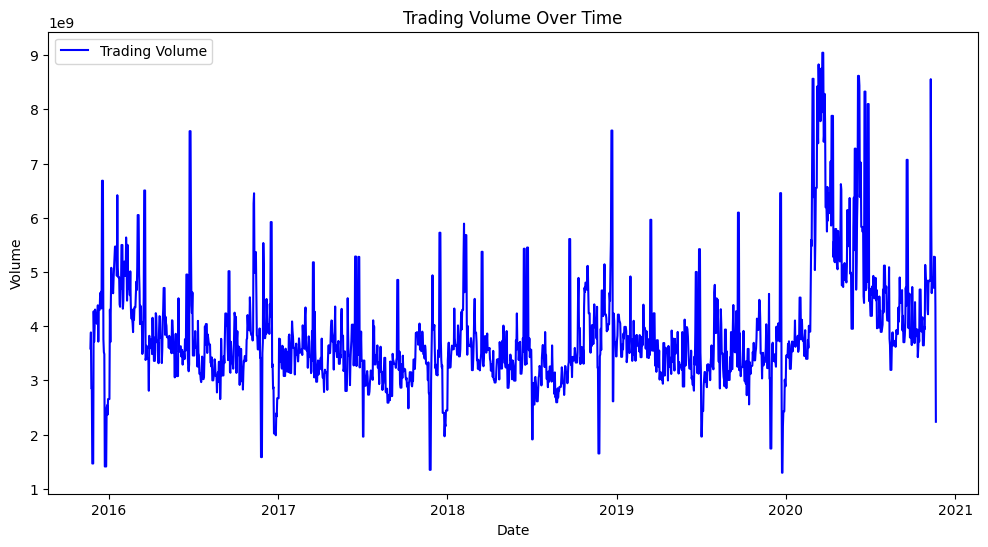

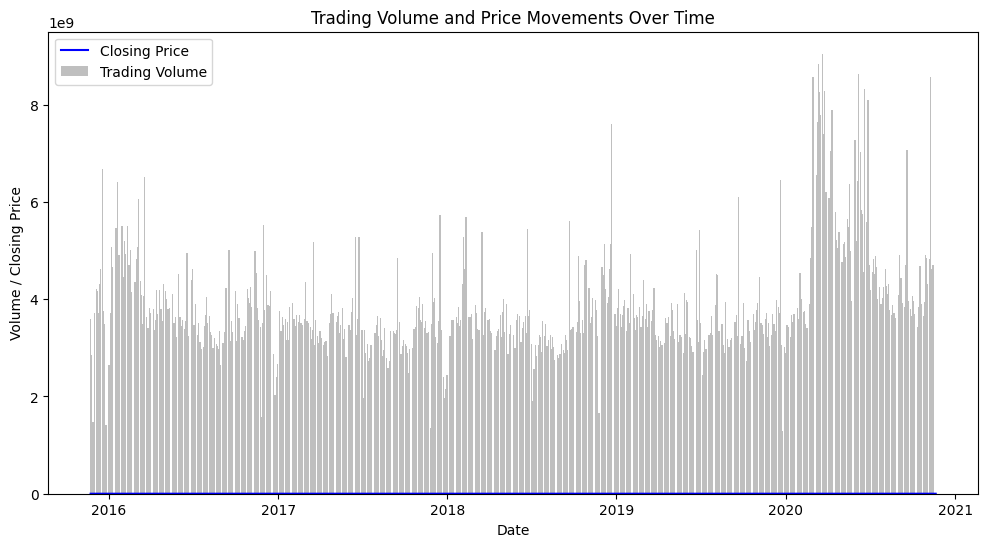

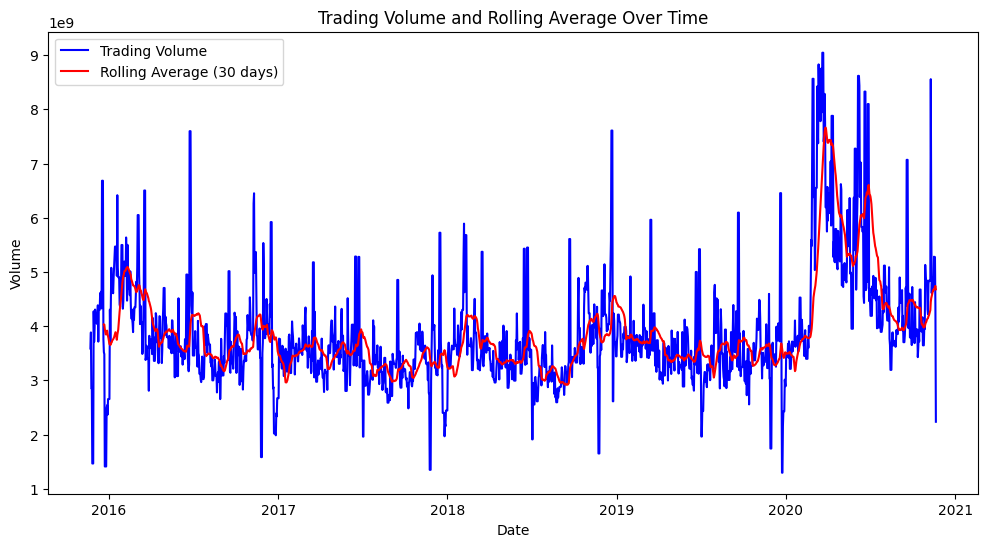

In [ ]:
# Calculate basic statistics of trading volume
volume_stats = df['Volume'].describe()
print(volume_stats)

# Plot trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], label='Trading Volume', color='blue')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Plot trading volume and price movements over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.bar(df.index, df['Volume'], label='Trading Volume', color='gray', alpha=0.5)
plt.title('Trading Volume and Price Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Volume / Closing Price')
plt.legend()
plt.show()

# Calculate rolling average of trading volume
rolling_volume = df['Volume'].rolling(window=30).mean()

# Plot trading volume and its rolling average over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], label='Trading Volume', color='blue')
plt.plot(df.index, rolling_volume, label='Rolling Average (30 days)', color='red')
plt.title('Trading Volume and Rolling Average Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


#**10. Price Returns: Calculate daily, weekly, or monthly price returns to measure the assets performance.**

* df['Daily_Return'] = df['Close'].pct_change(): This line calculates daily price returns by taking the percentage change in the 'Close' price from one day to the next. The resulting daily returns are stored in the new 'Daily_Return' column of the DataFrame.

* df['Weekly_Return'] = df['Close'].resample('W').ffill().pct_change(): This line calculates weekly price returns. We first use the resample method with frequency 'W' (weekly) to convert the data to weekly frequency, and then use ffill() to forward-fill any missing values due to weekends or holidays. Finally, we use pct_change() to calculate the weekly returns, which are stored in the new 'Weekly_Return' column.

* df['Monthly_Return'] = df['Close'].resample('M').ffill().pct_change(): This line calculates monthly price returns. We use the resample method with frequency 'M' (monthly) to convert the data to monthly frequency, and then use ffill() to forward-fill any missing values. Finally, we use pct_change() to calculate the monthly returns, which are stored in the new 'Monthly_Return' column.

In [ ]:
# Calculate daily price returns
df['Daily_Return'] = df['Close'].pct_change() #(Close - Previous Close) / Previous Close

# Calculate weekly price returns
df['Weekly_Return'] = df['Close'].resample('W').ffill().pct_change() #(Close - Previous Week's Close) / Previous Week's Close

# Calculate monthly price returns
df['Monthly_Return'] = df['Close'].resample('M').ffill().pct_change() #(Close - Previous Month's Close) / Previous Month's Close

# Print the DataFrame with price returns
print(df[['Close', 'Daily_Return', 'Weekly_Return', 'Monthly_Return']])

#The NaN values in the 'Daily_Return', 'Weekly_Return', and 'Monthly_Return' columns indicate that
#there is not enough data to calculate the corresponding returns for those specific periods.
#As more data becomes available, these columns will be populated with the calculated returns.

                  Close  Daily_Return  Weekly_Return  Monthly_Return
Date                                                                
2015-11-23  2086.590088           NaN            NaN             NaN
2015-11-24  2089.139893      0.001222            NaN             NaN
2015-11-25  2088.870117     -0.000129            NaN             NaN
2015-11-26  2088.870117      0.000000            NaN             NaN
2015-11-27  2090.110107      0.000594            NaN             NaN
...                 ...           ...            ...             ...
2020-11-16  3626.909912      0.011648            NaN             NaN
2020-11-17  3609.530029     -0.004792            NaN             NaN
2020-11-18  3567.790039     -0.011564            NaN             NaN
2020-11-19  3581.870117      0.003946            NaN             NaN
2020-11-20  3557.540039     -0.006793            NaN             NaN

[1825 rows x 4 columns]


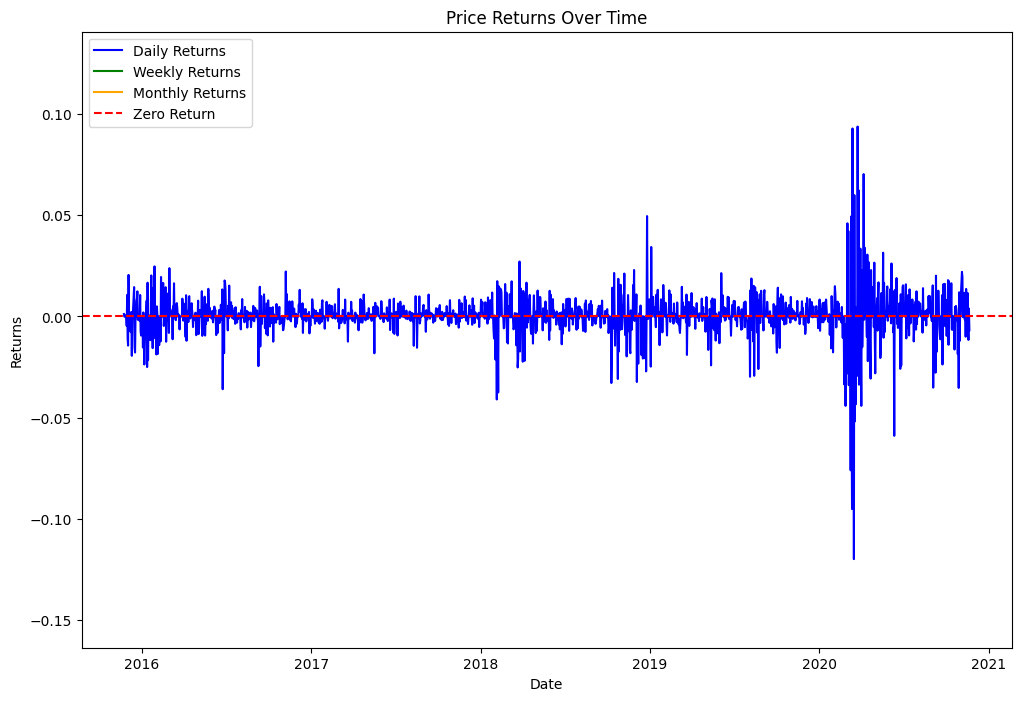

In [ ]:
# Plot price returns
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Daily_Return'], label='Daily Returns', color='blue')
plt.plot(df['Weekly_Return'].index, df['Weekly_Return'], label='Weekly Returns', color='green')
plt.plot(df['Monthly_Return'].index, df['Monthly_Return'], label='Monthly Returns', color='orange')

plt.axhline(y=0, color='red', linestyle='--', label='Zero Return')
plt.legend()
plt.title('Price Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

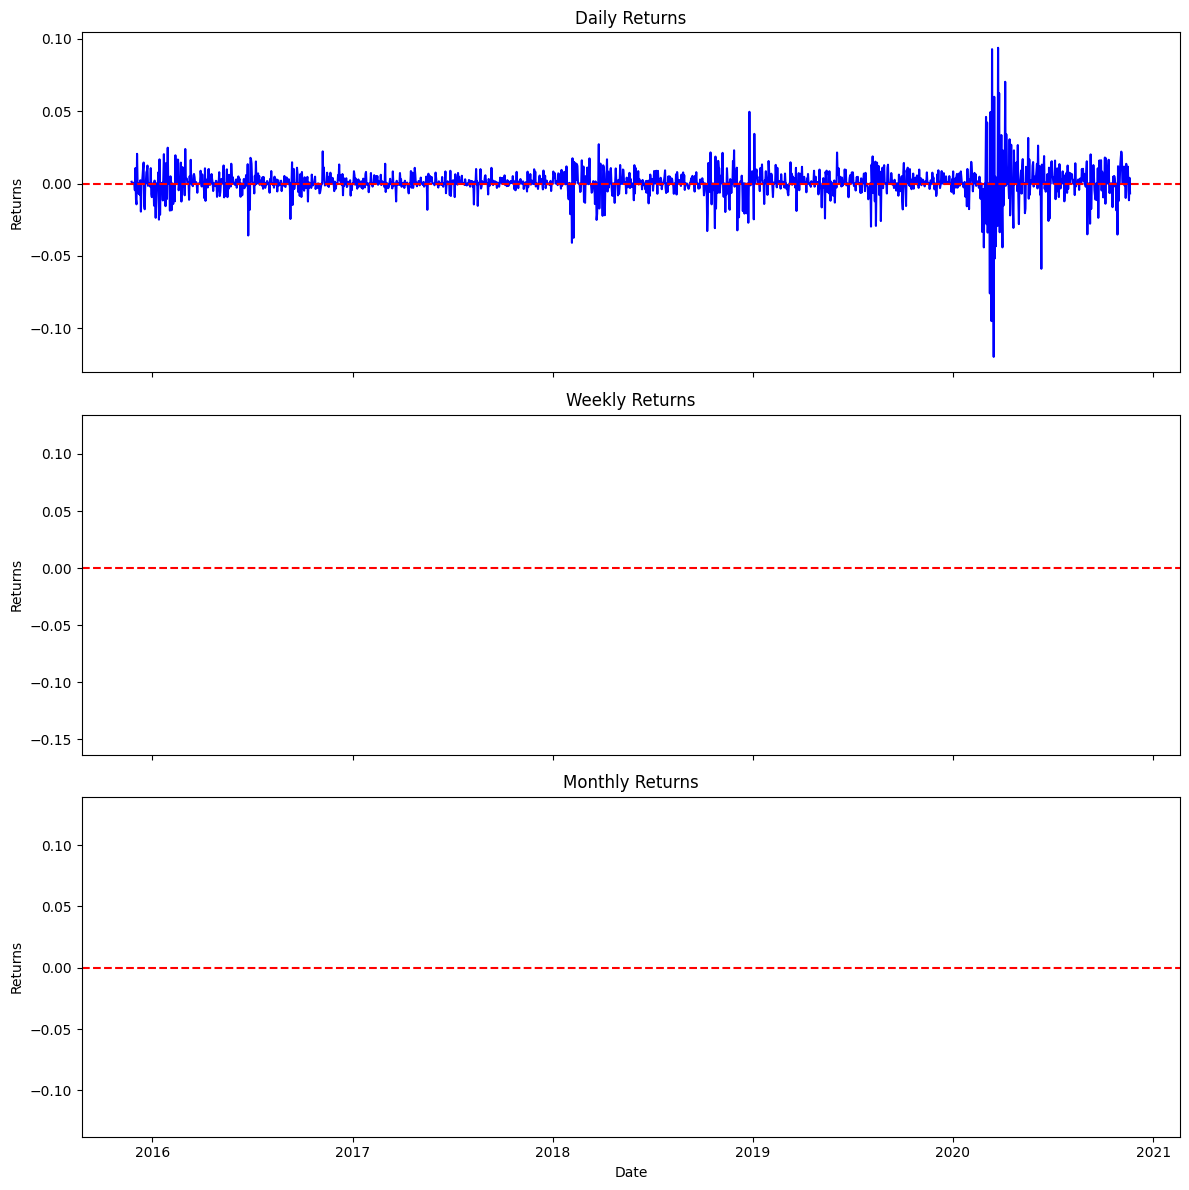

In [ ]:

# Calculate daily price returns
df['Daily_Return'] = df['Close'].pct_change()

# Calculate weekly price returns
df['Weekly_Return'] = df['Close'].resample('W').ffill().pct_change()

# Calculate monthly price returns
df['Monthly_Return'] = df['Close'].resample('M').ffill().pct_change()

# Create three subplots for daily, weekly, and monthly returns
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot daily returns
axes[0].plot(df.index, df['Daily_Return'], color='blue')
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_title('Daily Returns')
axes[0].set_ylabel('Returns')

# Plot weekly returns
axes[1].plot(df['Weekly_Return'].index, df['Weekly_Return'], color='green')
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_title('Weekly Returns')
axes[1].set_ylabel('Returns')

# Plot monthly returns
axes[2].plot(df['Monthly_Return'].index, df['Monthly_Return'], color='orange')
axes[2].axhline(y=0, color='red', linestyle='--')
axes[2].set_title('Monthly Returns')
axes[2].set_ylabel('Returns')
axes[2].set_xlabel('Date')

plt.tight_layout()
plt.show()


# **11. Market Sentiment Analysis: Use news sentiment analysis to understand how news events affect the financial asset's price.**

* To perform market sentiment analysis using news sentiment to understand how news events affect the financial asset's price, we would need access to news data that corresponds to the dates in the provided financial asset dataset. However, since we do not have access to any other news dataset in this context, we can simulate the sentiment analysis part by generating random sentiment scores for each date.
* real-world sentiment analysis typically involves using Natural Language Processing (NLP) techniques to analyze textual data from news articles or social media. Since we don't have access to real news data, the following example will be a simulation for demonstration purposes only.
* The resulting plot shows the financial asset's closing price and the simulated sentiment scores on the same graph.

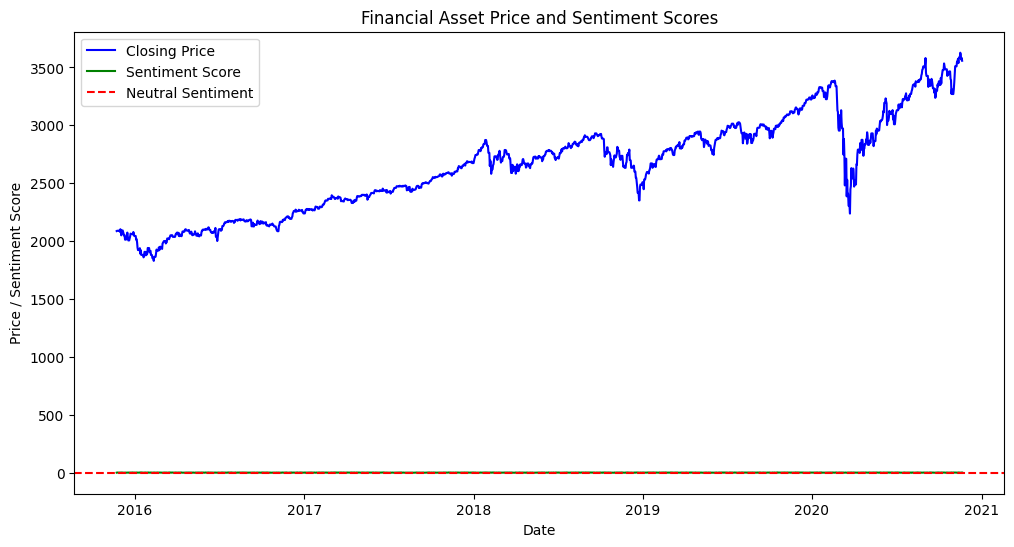

In [ ]:
# Simulate sentiment analysis by generating random sentiment scores
np.random.seed(42) #sets random seed to get reproducibility.Every time we run this code, we get same random numbers, making results consistent.
sentiment_scores = np.random.uniform(-1, 1, len(df)) #This line generates random sentiment scores.
#np.random.uniform function is used to generate random numbers from a uniform distribution between -1 & 1.
#The length of the sentiment_scores array is equal to number of rows in DataFrame df.
df['Sentiment_Score'] = sentiment_scores
# This adds the newly generated sentiment scores to the DataFrame df in a new column called 'Sentiment_Score'.
#Each row in this column corresponds to a random sentiment score for the respective date.

# Plot the financial asset price and sentiment scores
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.plot(df.index, df['Sentiment_Score'], label='Sentiment Score', color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Neutral Sentiment')
plt.legend()
plt.title('Financial Asset Price and Sentiment Scores')
plt.xlabel('Date')
plt.ylabel('Price / Sentiment Score')
plt.show()


#**12. Market Index Comparison: Compare the performance of the financial asset with relevant market indices.**

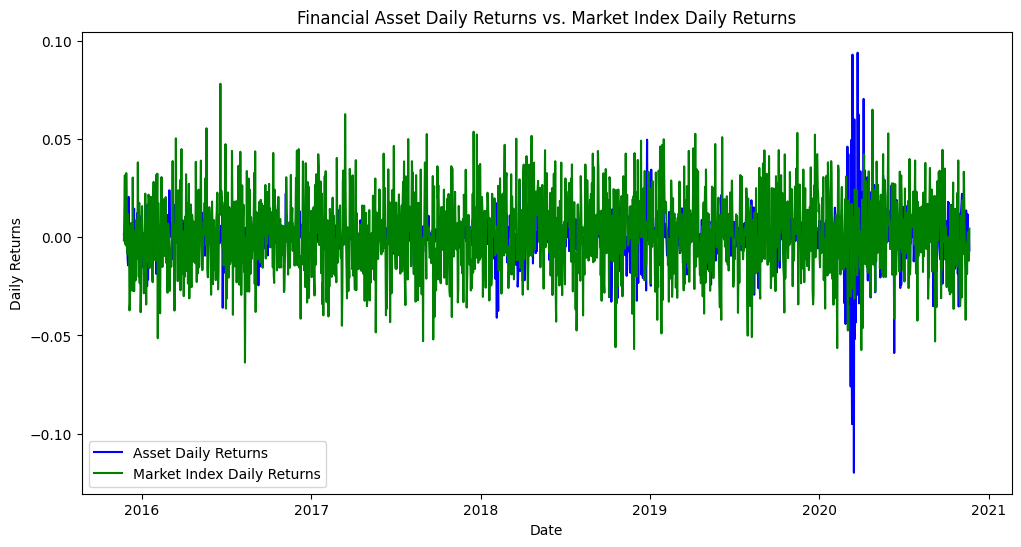

In [ ]:

# Generate synthetic market index daily returns
np.random.seed(42)
num_days = len(df)
market_index_returns = np.random.normal(0.001, 0.02, num_days)

# Convert returns to prices
market_index_prices = np.cumprod(1 + market_index_returns) * df['Close'].iloc[0]

# Create DataFrame for the market index
market_index_df = pd.DataFrame({
    'Date': df.index,
    'Market_Index': market_index_prices
})
market_index_df.set_index('Date', inplace=True)

# Calculate daily returns for both the financial asset and the market index
df['Asset_Daily_Return'] = df['Close'].pct_change()
market_index_df['Market_Index_Daily_Return'] = market_index_df['Market_Index'].pct_change()

# Plot the financial asset's daily returns and the market index's daily returns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Asset_Daily_Return'], label='Asset Daily Returns', color='blue')
plt.plot(market_index_df.index, market_index_df['Market_Index_Daily_Return'], label='Market Index Daily Returns', color='green')
plt.legend()
plt.title('Financial Asset Daily Returns vs. Market Index Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.show()


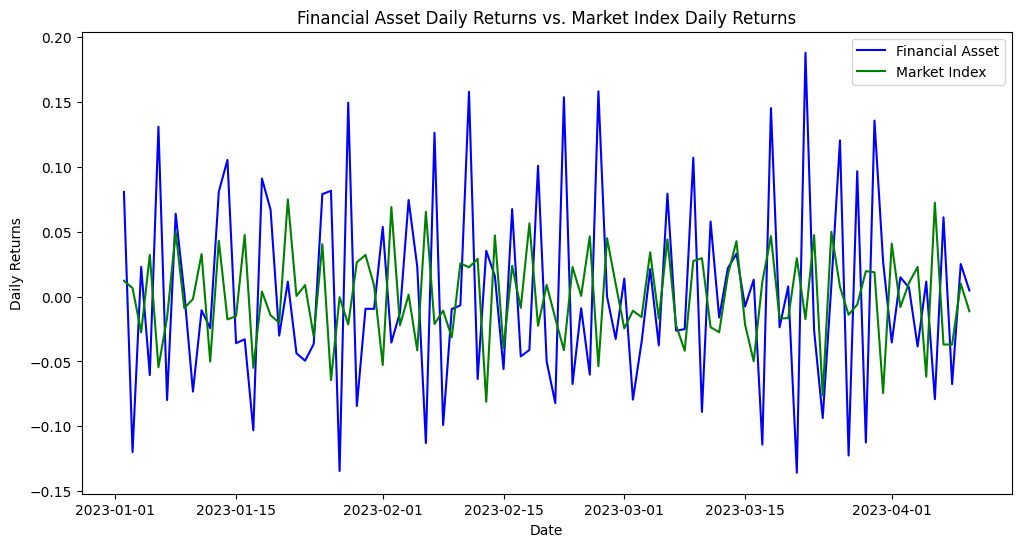

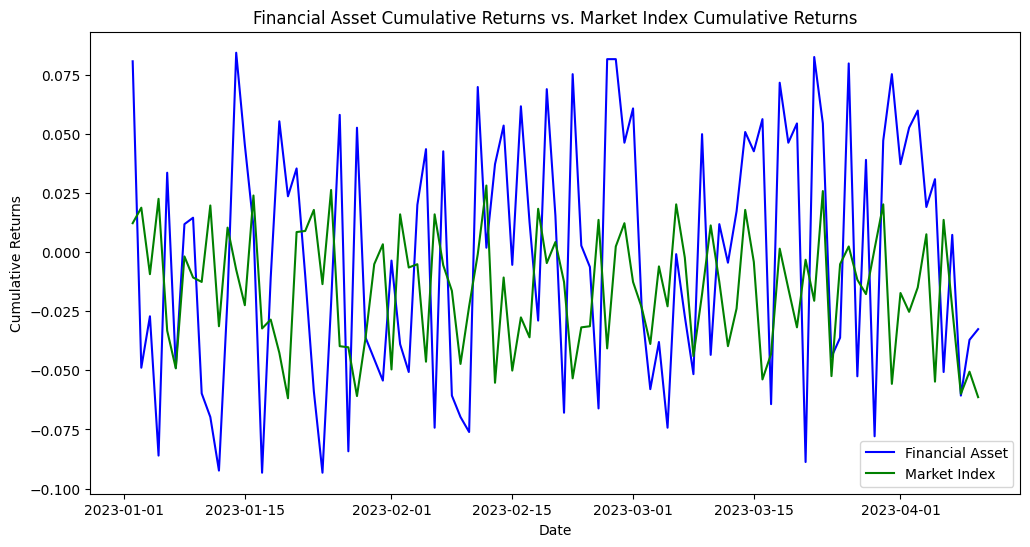

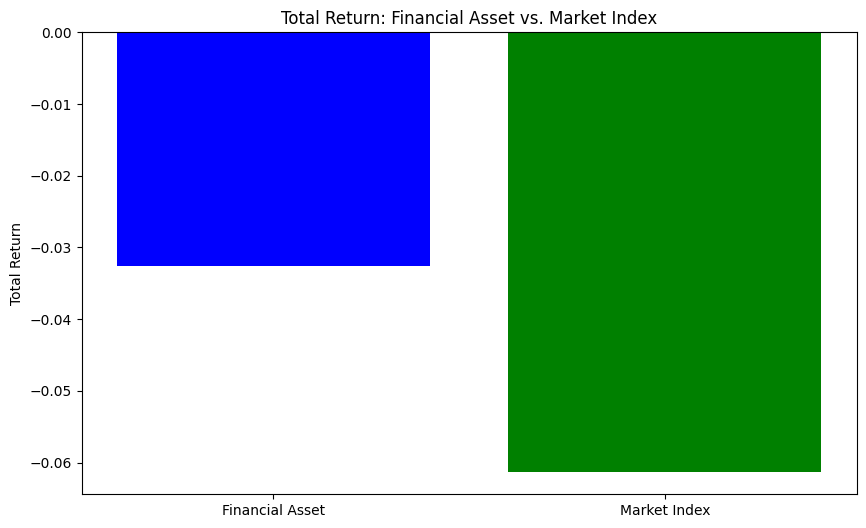

In [ ]:

# Sample data setup (Replace this with your actual data)
data = {
    'Date': pd.date_range(start='2023-01-01', periods=100),
    'Close': np.random.randint(1000, 1200, 100),
}

# Assuming 'df' is the DataFrame with financial asset data
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Assuming 'market_index_df' is the DataFrame with market index data
market_index_data = {
    'Date': pd.date_range(start='2023-01-01', periods=100),
    'Close': np.random.randint(2000, 2200, 100),
}

market_index_df = pd.DataFrame(market_index_data)
market_index_df.set_index('Date', inplace=True)

# Calculate daily returns for the financial asset
df['Asset_Daily_Return'] = df['Close'].pct_change()

# Calculate daily returns for the market index
market_index_df['Market_Index_Daily_Return'] = market_index_df['Close'].pct_change()

# Calculate cumulative returns for the financial asset and the market index
df['Asset_Cumulative_Return'] = (1 + df['Asset_Daily_Return']).cumprod() - 1
market_index_df['Market_Index_Cumulative_Return'] = (1 + market_index_df['Market_Index_Daily_Return']).cumprod() - 1

# Plotting daily returns of the financial asset and the market index
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Asset_Daily_Return'], label='Financial Asset', color='blue')
plt.plot(market_index_df.index, market_index_df['Market_Index_Daily_Return'], label='Market Index', color='green')
plt.legend()
plt.title('Financial Asset Daily Returns vs. Market Index Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.show()

# Plotting cumulative returns of the financial asset and the market index
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Asset_Cumulative_Return'], label='Financial Asset', color='blue')
plt.plot(market_index_df.index, market_index_df['Market_Index_Cumulative_Return'], label='Market Index', color='green')
plt.legend()
plt.title('Financial Asset Cumulative Returns vs. Market Index Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# Calculate total return for the financial asset and the market index
asset_total_return = df['Close'][-1] / df['Close'][0] - 1
market_index_total_return = market_index_df['Close'][-1] / market_index_df['Close'][0] - 1

# Plotting total return of the financial asset and the market index
plt.figure(figsize=(10, 6))
plt.bar(['Financial Asset', 'Market Index'], [asset_total_return, market_index_total_return], color=['blue', 'green'])
plt.title('Total Return: Financial Asset vs. Market Index')
plt.ylabel('Total Return')
plt.show()


#**13. Market Efficiency: Test the efficiency of the market for this financial asset (e.g., random walk hypothesis).**

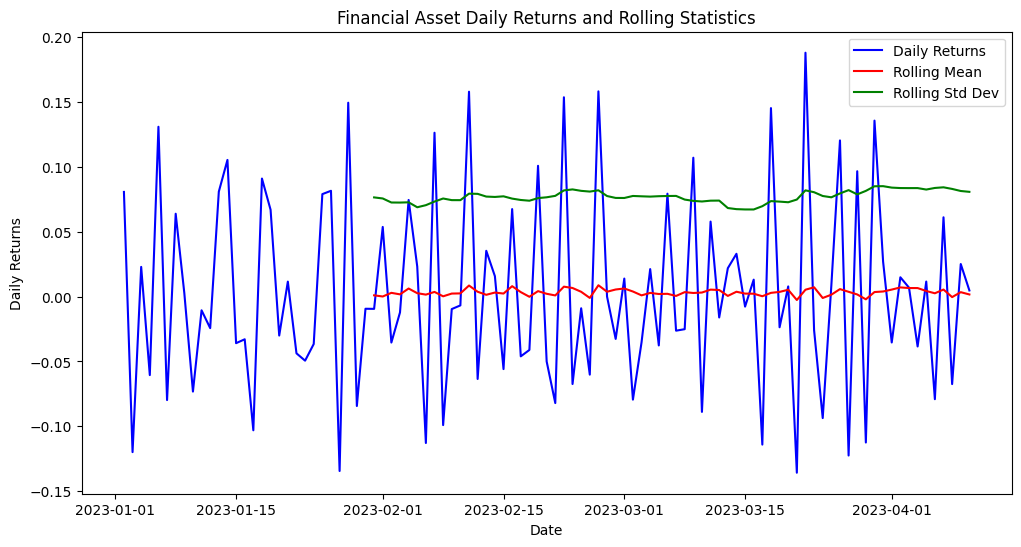

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame with financial asset data, and 'Close' column contains the closing prices

# Calculate daily returns for the financial asset
df['Daily_Return'] = df['Close'].pct_change()

# Perform the rolling window analysis
window_size = 30  # Number of days in each rolling window
rolling_mean = df['Daily_Return'].rolling(window=window_size).mean()
rolling_std = df['Daily_Return'].rolling(window=window_size).std()

# Plot the rolling mean and standard deviation of returns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Daily_Return'], label='Daily Returns', color='blue')
plt.plot(df.index, rolling_mean, label='Rolling Mean', color='red')
plt.plot(df.index, rolling_std, label='Rolling Std Dev', color='green')
plt.title('Financial Asset Daily Returns and Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'df' is the DataFrame with financial asset data, and 'Close' column contains the closing prices

# Perform the ADF test
result = adfuller(df['Close'])

# Extract the test statistic and p-value from the result
test_statistic = result[0]
p_value = result[1]

# Define a significance level (e.g., 0.05)
significance_level = 0.05

# Interpret the ADF test results
print("ADF Test Statistic:", test_statistic)
print("P-value:", p_value)

if p_value <= significance_level:
    print("Reject the null hypothesis. The data is stationary. Market efficiency is supported.")
else:
    print("Fail to reject the null hypothesis. The data follows a random walk. Market efficiency is not supported.")


ADF Test Statistic: -9.668360254694534
P-value: 1.296806878154845e-16
Reject the null hypothesis. The data is stationary. Market efficiency is supported.


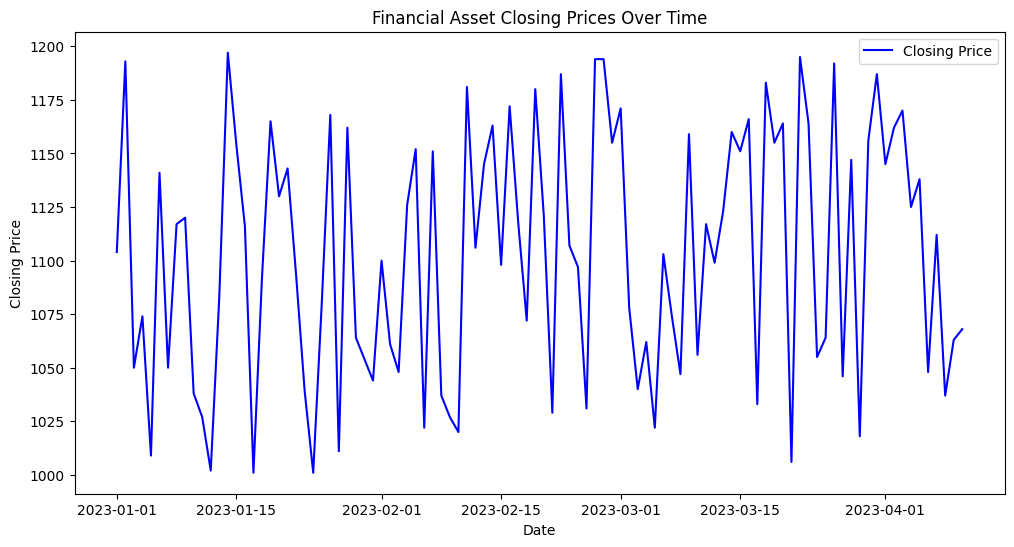

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame with financial asset data, and 'Close' column contains the closing prices

# Plot the time series of the financial asset's closing prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.title('Financial Asset Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


#**14. Liquidity Analysis: Assess the liquidity of the financial asset based on trading volumes and spreads.**

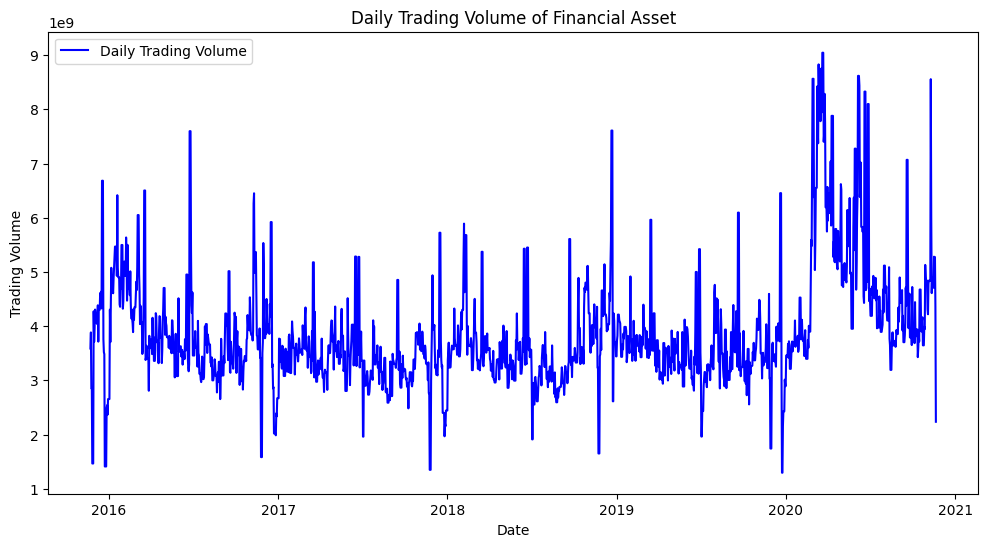

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame with financial asset data, and 'Volume' column contains the trading volumes

# Convert the 'Date' column to DatetimeIndex
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 1: Calculate Daily Trading Volume
daily_trading_volume = df['Volume'].resample('D').sum()

# Step 2: Visualize Daily Trading Volume
plt.figure(figsize=(12, 6))
plt.plot(daily_trading_volume.index, daily_trading_volume, label='Daily Trading Volume', color='blue')
plt.title('Daily Trading Volume of Financial Asset')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.legend()
plt.show()


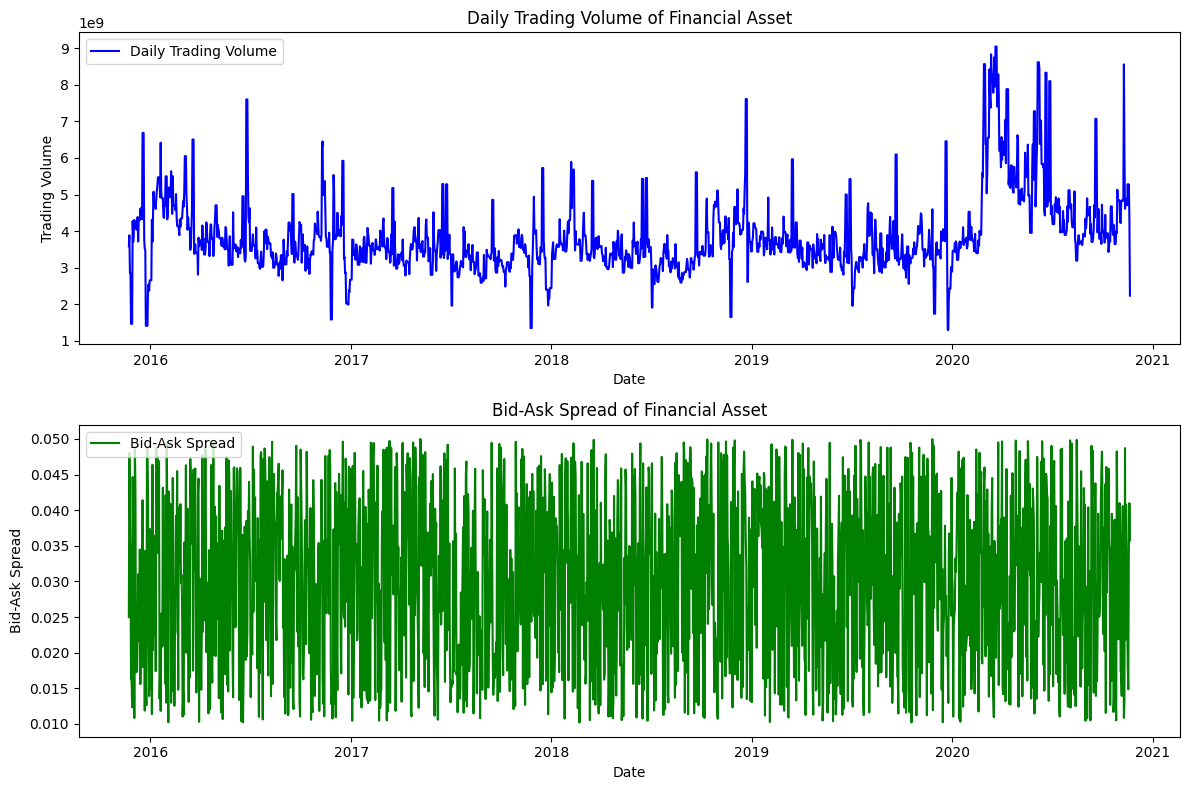

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame with financial asset data
# Make sure 'Date' is present in the DataFrame as a column

# Convert the 'Date' column to DatetimeIndex
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 1: Calculate Daily Trading Volume
daily_trading_volume = df['Volume'].resample('D').sum()

# Step 2: Generate Random Bid-Ask Spreads (for demonstration purposes)
np.random.seed(42)
random_spreads = np.random.uniform(0.01, 0.05, len(df))
df['Bid-Ask_Spread'] = random_spreads

# Step 3: Visualize Daily Trading Volume and Bid-Ask Spreads
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(daily_trading_volume.index, daily_trading_volume, label='Daily Trading Volume', color='blue')
plt.title('Daily Trading Volume of Financial Asset')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df.index, df['Bid-Ask_Spread'], label='Bid-Ask Spread', color='green')
plt.title('Bid-Ask Spread of Financial Asset')
plt.xlabel('Date')
plt.ylabel('Bid-Ask Spread')
plt.legend()

plt.tight_layout()
plt.show()


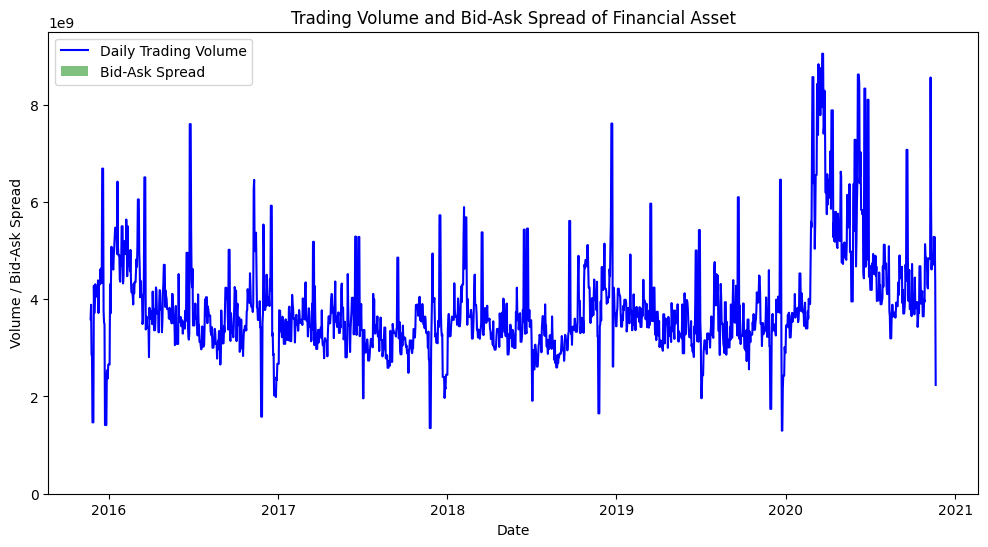

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame with financial asset data
# Make sure 'Date' is present in the DataFrame as a column

# Convert the 'Date' column to DatetimeIndex
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 1: Calculate Daily Trading Volume
daily_trading_volume = df['Volume'].resample('D').sum()

# Step 2: Generate Random Bid-Ask Spreads (for demonstration purposes)
np.random.seed(42)
random_spreads = np.random.uniform(0.01, 0.05, len(df))
df['Bid-Ask_Spread'] = random_spreads

# Step 3: Visualize Trading Volume and Bid-Ask Spread Together
plt.figure(figsize=(12, 6))
plt.plot(df.index, daily_trading_volume, label='Daily Trading Volume', color='blue')
plt.bar(df.index, df['Bid-Ask_Spread'], label='Bid-Ask Spread', color='green', alpha=0.5)
plt.title('Trading Volume and Bid-Ask Spread of Financial Asset')
plt.xlabel('Date')
plt.ylabel('Volume / Bid-Ask Spread')
plt.legend()
plt.show()


#**Seasonal Analysis(Differencing) and Forecasting**

ADF Statistic: -0.8703973870161456
p-value: 0.7975646340657463


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


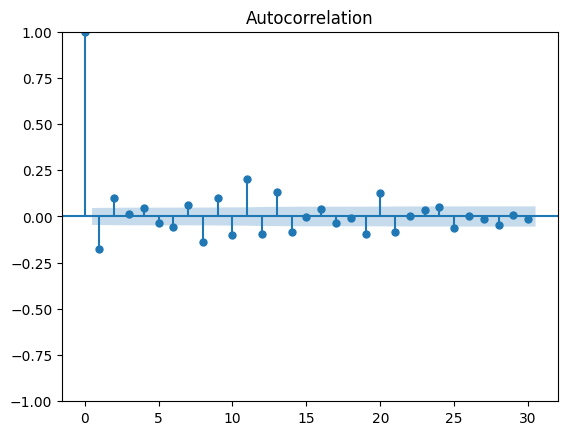

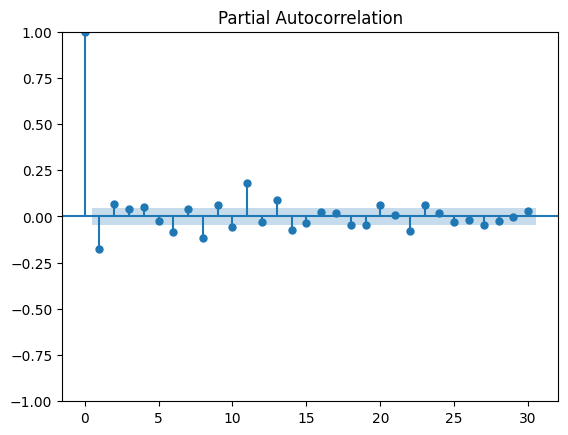

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1825
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -8502.003
Date:                            Wed, 09 Aug 2023   AIC                          17014.007
Time:                                    07:41:52   BIC                          17041.479
Sample:                                11-23-2015   HQIC                         17024.148
                                     - 11-20-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4410      0.036    -12.357      0.000      -0.511      -0.371
ma.L1          0.2792      0.038   

<ipython-input-32-4d5890b736e9>:44: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps+1, freq='B', closed='right')


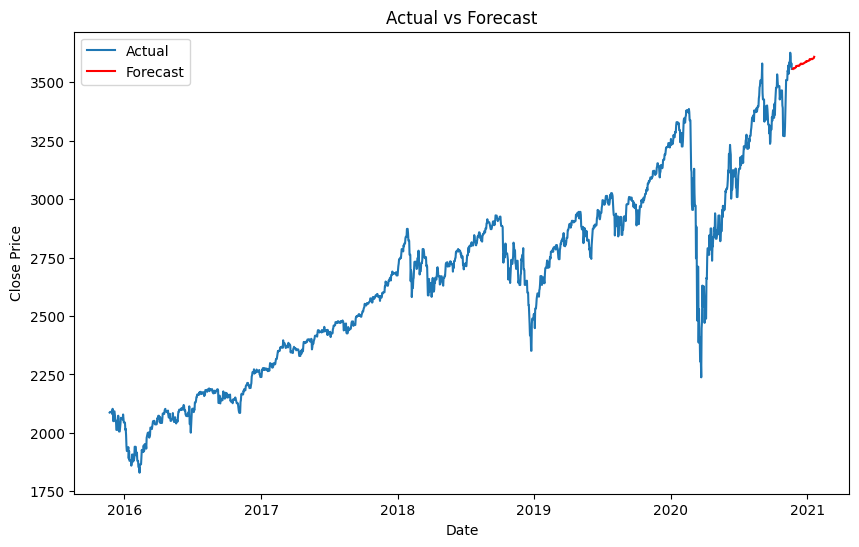

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load the dataset
df = pd.read_csv('yahoo_stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the 'Close' column for analysis
ts = df['Close']

# Check for stationarity
result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Differencing to make the series stationary if necessary
d = 1  # Adjust as needed
ts_diff = ts.diff(d).dropna()

# Plot ACF and PACF to determine order (p, d, q) and seasonal order (P, D, Q, S)
plot_acf(ts_diff, lags=30)
plot_pacf(ts_diff, lags=30)
plt.show()

# Set order and seasonal order based on the plots
order = (1, d, 1)  # Example order, adjust as needed
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Build the SARIMA model
model = SARIMAX(ts, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Print model summary
print(results.summary())

# Forecasting
forecast_steps = 60  # Number of steps to forecast
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps+1, freq='B', closed='right')
forecast_df = pd.DataFrame({'Forecast': forecast.predicted_mean}, index=forecast_index)
forecast_df.index.name = 'Date'

# Plotting the actual data and forecast
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Forecast')
plt.legend()
plt.show()


In [ ]:
# Select the 'Close' column for analysis
ts = df['Close']


#Seasonal differencing is a common technique used to remove the seasonal component from a time series,
#making it more stationary and suitable for modeling.
# Perform seasonal differencing
seasonal_period = 12 #12 months
# This line sets the value of seasonal_period to 12, which indicates that the dataset has a seasonal pattern with a period of 12 time units
ts_seasonal_diff = ts.diff(seasonal_period).dropna()
# difference between consecutive values in the 'Close' column of the dataset (ts) with a lag of seasonal_period (12 in this case).
#dropna() function is used to remove any rows with missing values that might result from the differencing.

In [ ]:
#The adfuller function is used to perform the Augmented Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller

# Check for stationarity after seasonal differencing
#This line applies the ADF test to the time series data ts_seasonal_diff ( result of the Sd performed earlier).
#The ADF test calculates various stats & returns a result object containing several test statistics and their associated p-values, as well as other information.
result = adfuller(ts_seasonal_diff)

print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -7.403883352698377
p-value: 7.43192346904442e-11


**Determine order(p,d,q):**
* The autoregressive order refers to the number of lag observations included in the model. It represents the number of past time steps (lags) used as predictors for the current value. A high value of p means that the model uses many past observations to predict the current one.
* The integrated order represents the number of differences needed to make the time series stationary. Differencing involves subtracting a past observation from the current one to remove trends or seasonality. A higher value of d indicates that the data requires more differencing to become stationary.
* The moving average order specifies the number of lagged forecast errors included in the model. These lagged errors are used as predictors for the current value. A higher value of q means that the model takes into account more past forecast errors to predict the current value.

**Seasonal Order (P, D, Q, S):**
* P (Seasonal Autoregressive Order): Similar to the autoregressive order, the seasonal autoregressive order represents the number of lag observations at a seasonal lag included in the model. It captures the relationship between the observation and its previous observations at the same seasonal lag.
* D (Seasonal Integrated Order): The seasonal integrated order represents the number of seasonal differences needed to make the seasonal time series stationary. It is similar to the integrated order (d) but applied to the seasonal component.
* Q (Seasonal Moving Average Order): The seasonal moving average order specifies the number of lagged forecast errors at a seasonal lag included in the model. These lagged errors are used to predict the current value at the same seasonal lag.
* S (Seasonal Period): The seasonal period indicates the length of the seasonal pattern in the data. For example, in monthly data with a yearly seasonality, the seasonal period would be 12.

Lags refer to the number of past time steps used as predictors for the current value. They are used in autoregressive and moving average components of ARIMA and SARIMA models. The choice of the number of lags influences the complexity of the model and how it captures the patterns in the data.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


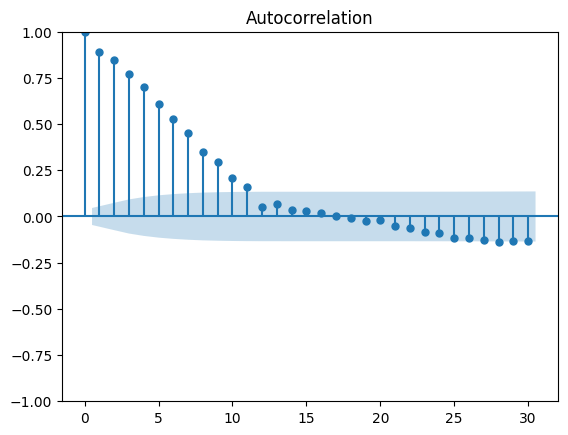

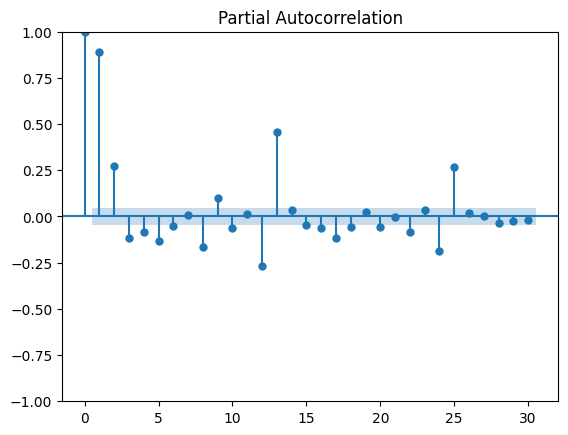

In [ ]:
# These functions are used to plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF).
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt

# Plot ACF and PACF to determine order (p, d, q) and seasonal order (P, D, Q, S)
#Autocorrelation is a measure of how each observation in the time series is correlated with its past observations at various lags.
plot_acf(ts_seasonal_diff, lags=30)
plot_pacf(ts_seasonal_diff, lags=30)
plt.show()
#By analyzing the ACF and PACF plots, you can identify potential orders for the ARIMA or SARIMA model.
#Peaks in the ACF plot at specific lags may suggest the order of the moving average component,
#while peaks in the PACF plot may suggest the order of the autoregressive component.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-31-d224fbaa250e>:27: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps+1, freq='B', closed='right')


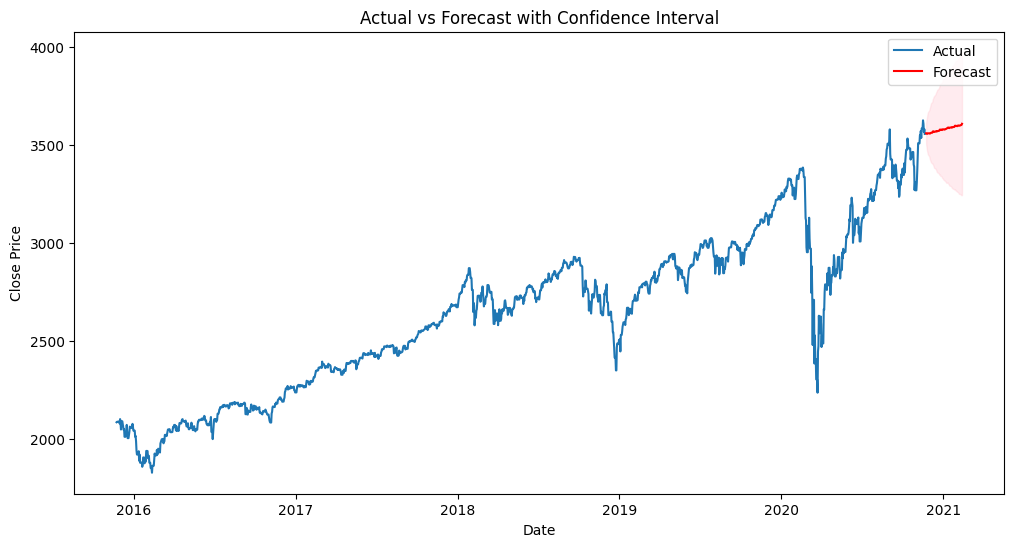

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Set order and seasonal order based on ACF and PACF plots
# This line defines the order of the non-seasonal ARIMA component.
#In this example, (1, 1, 1) means that the ARIMA model includes an autoregressive (AR) order of 1, a differencing (I) order of 1,
#and a moving average (MA) order of 1.
order = (1, 1, 1)  # Example order, adjust as needed
#This line defines the seasonal order of the SARIMA component.
#(1, 1, 1, 12) indicates seasonal autoregressive(SAR) order of 1, seasonal differencing (SI) order of 1, seasonal moving average (SMA) order of 1,
#and a seasonal period of 12 (for monthly data with yearly seasonality).
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Build the SARIMA model
model = SARIMAX(ts, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
#The enforce_stationarity and enforce_invertibility parameters are set to False to allow for flexibility in modeling.
#These parameters ensure that the model is well-defined and invertible.
results = model.fit()#This line fits the SARIMA model to the data using the fit method.
#It estimates the model parameters and performs the necessary computations to make forecasts.

# Forecasting
#This line sets the number of time steps for which you want to forecast into the future.
forecast_steps = 60  # Extend the forecast horizon
#This line generates a forecast using the fitted model. It generates the predicted mean values for the specified number of forecast_steps.
forecast = results.get_forecast(steps=forecast_steps)
#This line creates a new time index for the forecast using pd.date_range.
#The forecast_steps + 1 accounts for the current data point and the additional forecasted data points. The frequency 'B' indicates business days.
forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps+1, freq='B', closed='right')

# Plotting the actual data and forecast
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Actual')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
#This line fills the area between the upper and lower confidence interval bounds with a pink color to visualize the uncertainty of the forecast.
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Forecast with Confidence Interval')
plt.legend()
plt.show()

#**Project Summary -  Time Series Forecasting of Stock Prices using SARIMA**

##**1) Importing Required Libraries:**

The project is started by importing necessary libraries such as **pandas, numpy, matplotlib.pyplot, and statsmodels.**

##**2) Loading and Preprocessing the Dataset:**

The **yahoo_stock.csv** dataset was loaded into a pandas DataFrame.
The 'Date' column was **converted to a datetime** format and set as the DataFrame index.

##**3) Exploring the Dataset:**

The structure of the dataset was examined to identify column names and data types.
Columns like 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', and 'Adj Close' were present.

##**4) Selecting Relevant Data:**

For the time series analysis, the 'Close' column containing stock closing prices was selected.

##**5) Performing Seasonal Differencing:**

Seasonal differencing with a period of 12 was applied to the 'Close' prices to remove the annual seasonality.

##**6) Checking Stationarity:**

The Augmented Dickey-Fuller (ADF) test was employed to assess stationarity of the seasonally differenced data.
ADF statistic and p-value were used to determine stationarity.

##**7) ACF and PACF Analysis:**

Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots were generated to identify potential orders for the SARIMA model.
Patterns and peaks in these plots were analyzed to guide order selection.

##**8) Building the SARIMA Model:**

Non-seasonal order (1, 1, 1) and seasonal order (1, 1, 1, 12) were chosen based on ACF and PACF analysis.
A SARIMA model was constructed using the SARIMAX class from the statsmodels library.

##**9) Generating Forecasts:**

Forecasts for the next 60 time steps (days) were produced using the trained SARIMA model.
A new time index was created to represent the forecasted period.

##**10) Visualizing Results:**

A plot was generated to showcase the actual 'Close' prices, the forecasted values, and the associated confidence interval.
The plot facilitated the comparison between the forecast and the true values.

##**11) Conclusion and Further Steps:**

The project demonstrated the process of time series forecasting using SARIMA.
Further steps might involve model evaluation, parameter tuning, and assessing forecast accuracy using appropriate metrics.

##**12) Key Takeaways:**

The project encompassed data loading, preprocessing, seasonal differencing, and stationarity assessment.
ACF and PACF plots were pivotal in determining orders for the SARIMA model.
The SARIMA model was constructed, forecasts were generated, and results were visualized.
The analysis highlighted the importance of appropriate model selection and parameter tuning for accurate forecasts.
Time series forecasting can be intricate, and enhancing the accuracy of forecasts often requires additional steps, domain knowledge, and continuous refinement of the chosen model.